# IRAS 16562-3959: Infrared Analysis Selection, Multiwavelength Association, Determination of the Subclustering in the Region and of the Subclusters Properties


## Introduction

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; High-mass stars, which have masses superior to 8 times the mass of the sun, are very important in the evolution of their host galaxy, but their formation and early evolution are not well understood. Characterizing the environment in which high-mass stars form is an important step to decide between the main high-mass star formation theories. In the monolithic core accretion model, high-mass stars can form in isolation or in small-N multiple systems, and form contemporaneously with lower-mass stars. In contrast, in the competitive accretion model, the high-mass protostar is always associated with a cluster of low-mass stars, and is younger than the other stars in the cluster. As dynamical processes substantially affect the appearance of a cluster, the study of early stages of high-mass star formation, and particularly of their cluster environment, is necessary.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; During my PhD, I have studied the high-mass star-forming region IRAS 16562-3959. This region contains one of the most luminous O-type protostars in the Galaxy. While most high-mass stars appear to be formed in a rich cluster environment, this source is candidate for the formation of high-mass star in a relatively poor cluster.
I used a multiwavelength technique to study its environment, based on X-ray observations with the Chandra X-ray telescope, in conjunction with near- (VISTA/VVV) and mid-infrared (Spitzer) data. I thus determine the young stellar objects (YSOs) cluster membership based on infrared identification of the X-ray sources, and on infrared analysis of the region. I characterize the age, mass and evolution class of the cluster population using color-color and color-magnitude diagrams, and an X-ray and near-infrared relationship for median age determination. Then, I define the overall distribution of the clusters population using density (k-nearest neighbor density estimator) and statistical cluster hierarchy (HDBSCAN) techniques.

## Near- and Mid-infrared YSOs selection

I collected near-infrared data using the VISTA/VVV survey catalog, and mid-infrared data using the Spitzer/GLIMPSE survey catalog of the region. I crossed-match both catalogs and kept the sources having both near- and mid-infrared data.
This near- and mid-infrared association is useful to identify YSOs for Spitzer/GLIMPSE sources lacking [5.8] and/or [8.0] magnitudes.

In [1]:
# Loading the pandas library
import pandas as pd

In [2]:
# Loading the near- and mid-infrared data into a DataFrame
data_GLIMPSE_VISTA = pd.read_csv('GLIMPSE_VISTA_association_no_saturated_stars_no_cont_no_duplicates.csv')
data_GLIMPSE_VISTA.head()

,#src#,cat,designation,tmass_designation,RA,Dec,clon,clat,mag_j,dj_m,...,sig2(3_6-4_5),[4.5]-[5.8]+sig1,[3.6]-[4.5]-sig2,Ks-[4.5],sigma(45_80),sigma(36_58),[4.5]-[8.0]-sigma(45_80),[3.6]-[5.8]-sigma(36_58)Ks-[4.5],H-[4.5],Ks-[4.5].1
0,5063.0,SSTGLMC,G345.4905+01.3788,17000318-4007118,255.013266,-40.119968,17h00m03.18s,-40d07m11.88s,17.193001,0.245,...,-0.013,-0.221,0.094,0.948441,NaN,-0.153,NaN,0.153,2.216572,0.948441
1,2.0,SSTGLMC,G345.3754+01.4831,16591513-4008457,254.813073,-40.146025,16h59m15.14s,-40d08m45.69s,NaN,NaN,...,-0.011,NaN,-0.045,0.949988,NaN,NaN,NaN,NaN,2.147895,0.949988
2,3.0,SSTGLMC,G345.3766+01.4793,NaN,254.817900,-40.147431,16h59m16.30s,-40d08m50.75s,NaN,NaN,...,-0.008,NaN,0.195,0.916447,NaN,NaN,NaN,NaN,1.973186,0.916447
3,6.0,SSTGLMC,G345.3740+01.4762,NaN,254.819026,-40.151417,16h59m16.57s,-40d09m05.10s,NaN,NaN,...,-0.047,NaN,-0.057,1.298989,NaN,NaN,NaN,NaN,2.248823,1.298989
4,7.0,SSTGLMC,G345.3745+01.4791,NaN,254.816372,-40.149233,16h59m15.93s,-40d08m57.24s,NaN,NaN,...,-0.045,NaN,0.189,0.989509,NaN,NaN,NaN,NaN,1.945894,0.989509


In [3]:
# Checking the data columns
data_GLIMPSE_VISTA.columns

Index(['#src#', 'cat', 'designation', 'tmass_designation', 'RA', 'Dec', 'clon',
       'clat', 'mag_j', 'dj_m', 'mag_h', 'dh_m', 'mag_ks', 'dks_m', 'mag3_6',
       'd3_6m', 'mag4_5', 'd4_5m', 'mag5_8', 'd5_8m', 'mag8_0', 'd8_0m',
       'dist', 'color36_45', 'color36_58', 'color36_80', 'color45_58',
       'color45_80', 'color58_80', 'sourceID', 'ra', 'dec', 'zmyPnt',
       'zmyPntErr', 'ymjPnt', 'ymjPntErr', 'jmhPnt', 'jmhPntErr', 'hmksPnt',
       'hmksPntErr', 'jAperMag3', 'jAperMag3Err', 'hAperMag3', 'hAperMag3Err',
       'ksAperMag3', 'ksAperMag3Err', 'distance', 'separation', '[H-K]0',
       '[J-H]0', '[K-[3.6]]0', '[[3.6]-[4.5]]0', 'sigma1',
       '[[3.6]-[4.5]]0-sig1', 'sigma2', '[K-[3.6]]0-sig2', '[3.6]0',
       'sigma(H-4_5)', 'sigma(J-H)', '(H-4_5)+sigma(H-4_5)',
       '(J-H)+sigma(J-H)', 'sig1(4_5-5_8)', 'sig2(3_6-4_5)',
       '[4.5]-[5.8]+sig1', '[3.6]-[4.5]-sig2', 'Ks-[4.5]', 'sigma(45_80)',
       'sigma(36_58)', '[4.5]-[8.0]-sigma(45_80)',
       '[3.6]-[5.8]-si

In [4]:
# Checking the shape of the data
data_GLIMPSE_VISTA.shape

(9710, 72)

We observe that the total number of sources in this dataset is 9972. Now we want to select the young stellar objects (YSOs) from this dataset, by applying a set of color constrains from Gutermuth at al. 2009 and Winston et al. 2011 including the colors [K-[3.6]]$_0$, [[3.6]-[4.5]]$_0$, J-H, H-[4.5], H-K, and K-[4.5].

In [5]:
# Near- and mid-infrared selection from Gutermuth at al. 2009 and Winston et al. 2011
d = []
e = []

for index, row in data_GLIMPSE_VISTA.iterrows():
    if (
        data_GLIMPSE_VISTA.loc[index,'[[3.6]-[4.5]]0-sig1'] > 0.101 and 
        data_GLIMPSE_VISTA.loc[index,'[K-[3.6]]0-sig2'] > 0 and 
        data_GLIMPSE_VISTA.loc[index,'[K-[3.6]]0-sig2'] > (-2.85714 * (data_GLIMPSE_VISTA.loc[index,'[[3.6]-[4.5]]0-sig1'] - 0.101) + 0.5) and 
        (
            (data_GLIMPSE_VISTA.loc[index,'(H-4_5)+sigma(H-4_5)'] >= (data_GLIMPSE_VISTA.loc[index,'jmhPnt']-0.55 + data_GLIMPSE_VISTA.loc[index,'jmhPntErr'])*0.96) or
            (data_GLIMPSE_VISTA.loc[index,'hmksPnt'] <= (data_GLIMPSE_VISTA.loc[index,'Ks-[4.5]']-0.49)*0.98+0.3)
         ) and 
            (data_GLIMPSE_VISTA.loc[index,'jmhPnt'] > 0.7 and 
             data_GLIMPSE_VISTA.loc[index,'H-[4.5]'] > 0.49 and 
             data_GLIMPSE_VISTA.loc[index,'hmksPnt'] > 0.65 and
             data_GLIMPSE_VISTA.loc[index,'Ks-[4.5]'] > 0.49)
        
        ):    
        d.append(row)
    else:
        e.append(row)
        
# Creating two DataFrames containing the YSOs and the field stars
YSO_GLIMPSE_VISTA = pd.DataFrame(d)
field_stars_GLIMPSE_VISTA = pd.DataFrame(e)

In [6]:
YSO_GLIMPSE_VISTA.shape

(1566, 72)

In [7]:
YSO_GLIMPSE_VISTA.to_csv('YSO_GLIMPSE_VISTA.csv')

In [8]:
YSO_GLIMPSE_VISTA.head()

,#src#,cat,designation,tmass_designation,RA,Dec,clon,clat,mag_j,dj_m,...,sig2(3_6-4_5),[4.5]-[5.8]+sig1,[3.6]-[4.5]-sig2,Ks-[4.5],sigma(45_80),sigma(36_58),[4.5]-[8.0]-sigma(45_80),[3.6]-[5.8]-sigma(36_58)Ks-[4.5],H-[4.5],Ks-[4.5].1
4,7.0,SSTGLMC,G345.3745+01.4791,NaN,254.816372,-40.149233,16h59m15.93s,-40d08m57.24s,NaN,NaN,...,-0.045,NaN,0.189,0.989509,NaN,NaN,NaN,NaN,1.945894,0.989509
6,9.0,SSTGLMC,G345.3780+01.4977,NaN,254.800043,-40.134979,16h59m12.01s,-40d08m05.92s,NaN,NaN,...,-0.005,NaN,0.559,1.389210,NaN,NaN,NaN,NaN,2.268847,1.389210
7,10.0,SSTGLMC,G345.3793+01.4935,16591329-4008116,254.805420,-40.136562,16h59m13.30s,-40d08m11.62s,16.062,0.112,...,-0.030,NaN,0.198,0.945909,NaN,NaN,NaN,NaN,1.756372,0.945909
13,22.0,SSTGLMC,G345.3525+01.4830,16591071-4009503,254.794564,-40.164071,16h59m10.70s,-40d09m50.66s,NaN,NaN,...,-0.008,NaN,0.251,1.281809,NaN,NaN,NaN,NaN,2.592916,1.281809
17,27.0,SSTGLMC,G345.3599+01.4792,16591313-4009383,254.804487,-40.160681,16h59m13.08s,-40d09m38.45s,16.107,0.134,...,-0.034,NaN,0.292,1.727162,NaN,NaN,NaN,NaN,2.903532,1.727162


In [9]:
YSO_GLIMPSE_VISTA.columns

Index(['#src#', 'cat', 'designation', 'tmass_designation', 'RA', 'Dec', 'clon',
       'clat', 'mag_j', 'dj_m', 'mag_h', 'dh_m', 'mag_ks', 'dks_m', 'mag3_6',
       'd3_6m', 'mag4_5', 'd4_5m', 'mag5_8', 'd5_8m', 'mag8_0', 'd8_0m',
       'dist', 'color36_45', 'color36_58', 'color36_80', 'color45_58',
       'color45_80', 'color58_80', 'sourceID', 'ra', 'dec', 'zmyPnt',
       'zmyPntErr', 'ymjPnt', 'ymjPntErr', 'jmhPnt', 'jmhPntErr', 'hmksPnt',
       'hmksPntErr', 'jAperMag3', 'jAperMag3Err', 'hAperMag3', 'hAperMag3Err',
       'ksAperMag3', 'ksAperMag3Err', 'distance', 'separation', '[H-K]0',
       '[J-H]0', '[K-[3.6]]0', '[[3.6]-[4.5]]0', 'sigma1',
       '[[3.6]-[4.5]]0-sig1', 'sigma2', '[K-[3.6]]0-sig2', '[3.6]0',
       'sigma(H-4_5)', 'sigma(J-H)', '(H-4_5)+sigma(H-4_5)',
       '(J-H)+sigma(J-H)', 'sig1(4_5-5_8)', 'sig2(3_6-4_5)',
       '[4.5]-[5.8]+sig1', '[3.6]-[4.5]-sig2', 'Ks-[4.5]', 'sigma(45_80)',
       'sigma(36_58)', '[4.5]-[8.0]-sigma(45_80)',
       '[3.6]-[5.8]-si

In [10]:
field_stars_GLIMPSE_VISTA.shape

(8144, 72)

From this color selection, we have separated the YSOs from the contaminant field stars. We obtained 1613 YSOs, and 8359 field stars.
Let's plot the results of the infrared selection on the plots, or color-color diagrams (CCD), J-H vs H-[4.5] and H-K vs K-[4.5].

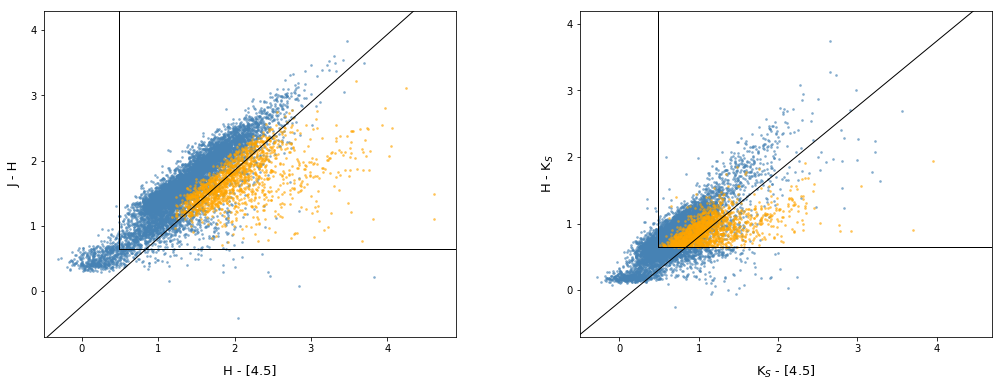

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


x_H_Ks_vs_Ks_45_IR_cont = np.arange(-0.5,4.5, 0.01)
y_H_Ks_vs_Ks_45_IR_cont = (x_H_Ks_vs_Ks_45_IR_cont - 0.49) * 0.98 + 0.3
x_J_H_vs_H_45_IR_cont = np.arange(-0.5,5, 0.01)
y_J_H_vs_H_45_IR_cont = (x_J_H_vs_H_45_IR_cont - 0.8)/0.96 + 0.6




plt.figure(1, figsize=(17,6))
plt.tick_params(labelsize=10)
plt.subplots_adjust(wspace=0.3)


# Selection of YSOs from Winston et al. 2011
ax1 = plt.subplot(121)
ax1.scatter(field_stars_GLIMPSE_VISTA['(H-4_5)+sigma(H-4_5)'], (field_stars_GLIMPSE_VISTA['jmhPnt']), alpha=0.5, s=3, c='steelblue')
ax1.scatter(YSO_GLIMPSE_VISTA['H-[4.5]'], YSO_GLIMPSE_VISTA['jmhPnt'], alpha=0.5, s=3, c='orange')
ax1.plot(x_J_H_vs_H_45_IR_cont,y_J_H_vs_H_45_IR_cont,'-k', linewidth=1.0)
ax1.plot((0.49, 4.9), (0.65, 0.65), 'k-', linewidth=1.0)
ax1.plot((0.49, 0.49), (0.65,4.3), 'k-', linewidth=1.0)
ax1.set_xlabel('H - [4.5]', fontsize=13, labelpad=10)
ax1.set_ylabel('J - H', fontsize=13, labelpad=10)
plt.gca().set_ylim(-0.7,4.3)
plt.gca().set_xlim(-0.5,4.9);



ax2 = plt.subplot(122)
ax2.scatter(field_stars_GLIMPSE_VISTA['Ks-[4.5]'], field_stars_GLIMPSE_VISTA['hmksPnt'], alpha=0.5, s=3, c='steelblue')
ax2.scatter(YSO_GLIMPSE_VISTA['Ks-[4.5]'], YSO_GLIMPSE_VISTA['hmksPnt'], alpha=0.5, s=3, c='orange')
ax2.plot(x_H_Ks_vs_Ks_45_IR_cont,y_H_Ks_vs_Ks_45_IR_cont,'-k', linewidth=1.0)
ax2.plot((0.49, 4.7), (0.65, 0.65), 'k-', linewidth=1.0)
ax2.plot((0.49, 0.49), (0.65,4.3), 'k-', linewidth=1.0)
ax2.set_xlabel('K$_S$ - [4.5]', fontsize=13, labelpad=10)
ax2.set_ylabel('H - K$_S$', fontsize=13, labelpad=10)
plt.gca().set_ylim(-0.7,4.2)
plt.gca().set_xlim(-0.5,4.7);


These are the CCDs showing the infrared excess sources selection. The orange dots correspond to the infrared excess sources or YSOs, and the blue dots correspond to field stars.

In [12]:
field_stars_GLIMPSE_VISTA.columns

Index(['#src#', 'cat', 'designation', 'tmass_designation', 'RA', 'Dec', 'clon',
       'clat', 'mag_j', 'dj_m', 'mag_h', 'dh_m', 'mag_ks', 'dks_m', 'mag3_6',
       'd3_6m', 'mag4_5', 'd4_5m', 'mag5_8', 'd5_8m', 'mag8_0', 'd8_0m',
       'dist', 'color36_45', 'color36_58', 'color36_80', 'color45_58',
       'color45_80', 'color58_80', 'sourceID', 'ra', 'dec', 'zmyPnt',
       'zmyPntErr', 'ymjPnt', 'ymjPntErr', 'jmhPnt', 'jmhPntErr', 'hmksPnt',
       'hmksPntErr', 'jAperMag3', 'jAperMag3Err', 'hAperMag3', 'hAperMag3Err',
       'ksAperMag3', 'ksAperMag3Err', 'distance', 'separation', '[H-K]0',
       '[J-H]0', '[K-[3.6]]0', '[[3.6]-[4.5]]0', 'sigma1',
       '[[3.6]-[4.5]]0-sig1', 'sigma2', '[K-[3.6]]0-sig2', '[3.6]0',
       'sigma(H-4_5)', 'sigma(J-H)', '(H-4_5)+sigma(H-4_5)',
       '(J-H)+sigma(J-H)', 'sig1(4_5-5_8)', 'sig2(3_6-4_5)',
       '[4.5]-[5.8]+sig1', '[3.6]-[4.5]-sig2', 'Ks-[4.5]', 'sigma(45_80)',
       'sigma(36_58)', '[4.5]-[8.0]-sigma(45_80)',
       '[3.6]-[5.8]-si

Our list of YSOs contains sources with two different evolutionary stages: Class I and Class II. A color selection from Gutermuth et al. 2009 allow us to separate Class I sources from Class II sources. This identification of the different evolutionary stages is important for further analysis.

In [13]:
# Separation of the Class I sources from the Class II sources
list_class_I_GLIMPSE_VISTA = []
list_class_II_GLIMPSE_VISTA = []


for index, row in YSO_GLIMPSE_VISTA.iterrows():
    if YSO_GLIMPSE_VISTA.loc[index,'[K-[3.6]]0-sig2'] > (-2.85714 * (YSO_GLIMPSE_VISTA.loc[index,'[[3.6]-[4.5]]0-sig1'] - 0.401) + 1.7) and YSO_GLIMPSE_VISTA.loc[index,'[3.6]0'] < 15:
        list_class_I_GLIMPSE_VISTA.append(row)
    elif YSO_GLIMPSE_VISTA.loc[index,'[3.6]0'] < 14.5:
        list_class_II_GLIMPSE_VISTA.append(row)
        
# Creation of a new DataFrame containing the Class I sources an Class II sources        
Class_I_GLIMPSE_VISTA = pd.DataFrame(list_class_I_GLIMPSE_VISTA)
Class_II_GLIMPSE_VISTA = pd.DataFrame(list_class_II_GLIMPSE_VISTA)

In [14]:
# Adding a new column describing the class
Class_I_GLIMPSE_VISTA['class'] = '1'
Class_I_GLIMPSE_VISTA.head()

,#src#,cat,designation,tmass_designation,RA,Dec,clon,clat,mag_j,dj_m,...,[4.5]-[5.8]+sig1,[3.6]-[4.5]-sig2,Ks-[4.5],sigma(45_80),sigma(36_58),[4.5]-[8.0]-sigma(45_80),[3.6]-[5.8]-sigma(36_58)Ks-[4.5],H-[4.5],Ks-[4.5].1,class
466,816.0,SSTGLMC,G345.3345+01.5037,NaN,254.758836,-40.165405,16h59m02.12s,-40d09m55.46s,NaN,NaN,...,1.348,1.106,3.702328,NaN,-0.016,NaN,2.584,4.607121,3.702328,1
1780,3052.0,SSTGLMC,G345.3756+01.4163,16593166-4011136,254.881928,-40.187147,16h59m31.66s,-40d11m13.73s,NaN,NaN,...,NaN,0.704,2.340023,NaN,NaN,NaN,NaN,4.028718,2.340023,1
1784,3056.0,SSTGLMC,G345.2894+01.5714,16583663-4009318,254.652636,-40.158874,16h58m36.63s,-40d09m31.95s,15.809,0.075,...,0.882,0.497,2.235494,NaN,-0.033,NaN,1.447,3.257960,2.235494,1
1801,3085.0,SSTGLMC,G345.3725+01.4219,16592966-4011102,254.873620,-40.186151,16h59m29.67s,-40d11m10.14s,NaN,NaN,...,NaN,0.728,2.317133,NaN,NaN,NaN,NaN,3.723658,2.317133,1
1802,3088.0,SSTGLMC,G345.3721+01.4228,NaN,254.872420,-40.185947,16h59m29.38s,-40d11m09.41s,NaN,NaN,...,NaN,0.710,1.992914,NaN,NaN,NaN,NaN,2.935084,1.992914,1


In [15]:
# Adding a new column describing the class
Class_II_GLIMPSE_VISTA['class'] = '2'
Class_II_GLIMPSE_VISTA.head()

,#src#,cat,designation,tmass_designation,RA,Dec,clon,clat,mag_j,dj_m,...,[4.5]-[5.8]+sig1,[3.6]-[4.5]-sig2,Ks-[4.5],sigma(45_80),sigma(36_58),[4.5]-[8.0]-sigma(45_80),[3.6]-[5.8]-sigma(36_58)Ks-[4.5],H-[4.5],Ks-[4.5].1,class
4,7.0,SSTGLMC,G345.3745+01.4791,NaN,254.816372,-40.149233,16h59m15.93s,-40d08m57.24s,NaN,NaN,...,NaN,0.189,0.989509,NaN,NaN,NaN,NaN,1.945894,0.989509,2
6,9.0,SSTGLMC,G345.3780+01.4977,NaN,254.800043,-40.134979,16h59m12.01s,-40d08m05.92s,NaN,NaN,...,NaN,0.559,1.389210,NaN,NaN,NaN,NaN,2.268847,1.389210,2
7,10.0,SSTGLMC,G345.3793+01.4935,16591329-4008116,254.805420,-40.136562,16h59m13.30s,-40d08m11.62s,16.062,0.112,...,NaN,0.198,0.945909,NaN,NaN,NaN,NaN,1.756372,0.945909,2
13,22.0,SSTGLMC,G345.3525+01.4830,16591071-4009503,254.794564,-40.164071,16h59m10.70s,-40d09m50.66s,NaN,NaN,...,NaN,0.251,1.281809,NaN,NaN,NaN,NaN,2.592916,1.281809,2
17,27.0,SSTGLMC,G345.3599+01.4792,16591313-4009383,254.804487,-40.160681,16h59m13.08s,-40d09m38.45s,16.107,0.134,...,NaN,0.292,1.727162,NaN,NaN,NaN,NaN,2.903532,1.727162,2


In [16]:
Class_I_GLIMPSE_VISTA.shape

(32, 73)

In [17]:
Class_II_GLIMPSE_VISTA.shape

(1534, 73)

From this first YSOs selection using near- and mid-infrared data, we obtained a total of 49 Class I sources, an d a total of 1564 Class II sources.
Lets plot the results into the CCD [K-[3.6]]$_0$ vs [[3.6]-[4.5]]$_0$.

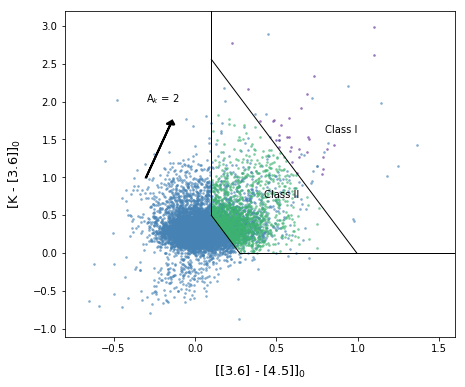

In [18]:
from pylab import *

x_color_K_36_min_sig2_v_color_36_45_min_sig1_top = arange(0.101, 0.9965, 0.0001)
y_color_K_36_min_sig2_v_color_36_45_min_sig1_top = -2.85714 * (x_color_K_36_min_sig2_v_color_36_45_min_sig1_top - 0.401) + 1.7

x_color_K_36_min_sig2_v_color_36_45_min_sig1_bottom = arange(0.101, 0.2761, 0.0001)
y_color_K_36_min_sig2_v_color_36_45_min_sig1_bottom = -2.85714 * (x_color_K_36_min_sig2_v_color_36_45_min_sig1_bottom - 0.101) + 0.5

plt.figure(1, figsize=(7,6))
plt.tick_params(labelsize=10)
ax1 = plt.subplot(111)
ax1.scatter(field_stars_GLIMPSE_VISTA['[[3.6]-[4.5]]0-sig1'], field_stars_GLIMPSE_VISTA['[K-[3.6]]0-sig2'], alpha=0.5, s=3, c='steelblue')
ax1.scatter(Class_I_GLIMPSE_VISTA['[[3.6]-[4.5]]0-sig1'], Class_I_GLIMPSE_VISTA['[K-[3.6]]0-sig2'], alpha=0.5, s=3, c='rebeccapurple')
ax1.scatter(Class_II_GLIMPSE_VISTA['[[3.6]-[4.5]]0-sig1'], Class_II_GLIMPSE_VISTA['[K-[3.6]]0-sig2'], alpha=0.5, s=3, c='mediumseagreen')
ax1.plot(x_color_K_36_min_sig2_v_color_36_45_min_sig1_top, y_color_K_36_min_sig2_v_color_36_45_min_sig1_top, '-k', linewidth=1)
ax1.plot(x_color_K_36_min_sig2_v_color_36_45_min_sig1_bottom, y_color_K_36_min_sig2_v_color_36_45_min_sig1_bottom, '-k', linewidth=1)
ax1.plot((0.2761, 1.6), (0, 0), '-k', linewidth=1)
ax1.plot((0.101, 0.101), (0.5, 3.2), '-k', linewidth=1)
ax1.text(0.75, 0.65, 'Class I',transform=ax1.transAxes, ha='right', va='top')
ax1.text(0.6, 0.45, 'Class II',transform=ax1.transAxes, ha='right', va='top')
ax1.arrow(-0.3,1,0.15,0.7, color='k', linewidth=2.0, head_width=0.05, head_length=0.05 )
ax1.text(-0.3,2,'A$_k$ = 2', fontsize=10, color='k')
ax1.set_xlabel('[[3.6] - [4.5]]$_0$', fontsize=13, labelpad=10)
ax1.set_ylabel('[K - [3.6]]$_0$', fontsize=13, labelpad=10)
plt.gca().set_ylim(-1.1,3.2)
plt.gca().set_xlim(-0.8,1.6);

This CCD [K$_S$-[3.6]]$_0$ vs [[3.6]-[4.5]]$_0$ was for the isolation of Class I and Class II YSOs. Purple dots correspond to Class I YSOs, green dots correspond to Class II YSOs, and blue dots are field stars.

From this first selection of YSOs, we will be adding mid-infrared data from the Spitzer/GLIMPSE catalog that contain data in the four IRAC bands in order to be able to use the Gutermuth et al. 2009 phase I infrared selection. I have already cleaned the data and selected the sources without contamination.

## Selection of the Mid-Infrared Only Sources

In [19]:
# Loading the Spitzer/GLIMPSE data
data_GLIMPSE = pd.read_csv('GLIMPSE_without_contamination.csv')
data_GLIMPSE.head()

,#src#,cat,designation,RA,Dec,clon,clat,mag_j,mag_h,mag_ks,...,sigma2([3.6]-[4.5]),sigma3([4.5]-[8.0]),sigma4([3.6]-[5.8]),color45_58+sigma1,color36_45-sigma2,1.4*(color45_58+sigma1-0.7)+0.15,color45_80-sigma3,color36_58-sigma4,color36_58+sigma4,0.14/0.04*((color45_80-sigma3)-0.5)+0.5
0,1,SSTGLMC,G345.3615+01.6782,254.601547,-40.036100,16h58m24.37s,-40d02m09.96s,12.589,10.597,9.785,...,-0.017,0.013,-0.001,0.292,-0.081,-0.4212,0.280,0.179,0.177,-0.2700
1,2,SSTGLMC,G345.3675+01.6819,254.602652,-40.029125,16h58m24.64s,-40d01m44.85s,12.894,10.969,10.24,...,-0.015,0.011,0.001,0.307,-0.126,-0.4002,0.194,0.149,0.151,-0.5710
2,3,SSTGLMC,G345.3354+01.6564,254.602771,-40.070040,16h58m24.67s,-40d04m12.14s,11.874,11.5,11.421,...,-0.022,-0.062,-0.028,0.078,0.079,-0.7208,0.413,0.169,0.113,0.1955
3,4,SSTGLMC,G345.3560+01.6727,254.602783,-40.043822,16h58m24.67s,-40d02m37.76s,13.065,11.101,10.245,...,-0.009,-0.001,-0.009,0.362,-0.193,-0.3232,0.358,0.169,0.151,0.0030
4,5,SSTGLMC,G345.3316+01.6529,254.603255,-40.075195,16h58m24.78s,-40d04m30.70s,Nan,Nan,Nan,...,-0.028,-0.074,-0.056,0.495,-0.002,-0.1370,1.081,0.549,0.437,2.5335


In [20]:
data_GLIMPSE.columns

Index(['#src#', 'cat', 'designation', 'RA', 'Dec', 'clon', 'clat', 'mag_j',
       'mag_h', 'mag_ks', 'mag3_6', 'd3_6m', 'mag4_5', 'd4_5m', 'mag5_8',
       'd5_8m', 'mag8_0', 'd8_0m', 'dist', 'color36_45', 'color36_58',
       'color36_80', 'color45_58', 'color45_80', 'color58_80',
       'sigma1([4.5]-[5.8])', 'sigma2([3.6]-[4.5])', 'sigma3([4.5]-[8.0])',
       'sigma4([3.6]-[5.8])', 'color45_58+sigma1', 'color36_45-sigma2',
       '1.4*(color45_58+sigma1-0.7)+0.15', 'color45_80-sigma3',
       'color36_58-sigma4', 'color36_58+sigma4',
       '0.14/0.04*((color45_80-sigma3)-0.5)+0.5'],
      dtype='object')

In [21]:
data_GLIMPSE.shape

(2702, 36)

We select the Class I and Class II YSOs from the dataset using color selection from Gutermuth et al. 2009. At first we separate the Class I YSOs from the not Class I sources. Then, we select the Class II YSOs from the not Class I sources dataset.

In [22]:
# Selection of Class I sources and crating a DataFrame for Class I sources and for not Class I sources
list_class_I_GLIMPSE = []
list_not_class_I_GLIMPSE = []

for index, row in data_GLIMPSE.iterrows():
    if data_GLIMPSE.loc[index,'color45_58'] > 0.7 and data_GLIMPSE.loc[index,'color36_45'] > 0.7 :
        list_class_I_GLIMPSE.append(row)
    else:
        list_not_class_I_GLIMPSE.append(row)
        
Class_I_GLIMPSE = pd.DataFrame(list_class_I_GLIMPSE)
not_class_I_GLIMPSE  = pd.DataFrame(list_not_class_I_GLIMPSE)

In [23]:
Class_I_GLIMPSE['class'] = '1'

In [24]:
Class_I_GLIMPSE.shape

(42, 37)

In [25]:
Class_I_GLIMPSE.to_csv('YSO_Class_I_GLIMPSE.csv')

In [26]:
not_class_I_GLIMPSE.shape

(2660, 36)

In [27]:
# Selection of the Class II YSOs from the not Class I sources dataset and creation of a DataFrame for the Class II
# YSOs and for the field stars
list_class_II_GLIMPSE = []
list_field_stars_GLIMPSE = []

for index, row in not_class_I_GLIMPSE.iterrows():
    if not_class_I_GLIMPSE.loc[index,'color45_80-sigma3'] > 0.5 and not_class_I_GLIMPSE.loc[index,'color36_58-sigma4'] > 0.35 and not_class_I_GLIMPSE.loc[index,'color36_45-sigma2'] > 0.15 and not_class_I_GLIMPSE.loc[index,'color36_58+sigma4'] <= not_class_I_GLIMPSE.loc[index,'0.14/0.04*((color45_80-sigma3)-0.5)+0.5']:
        list_class_II_GLIMPSE.append(row)
    else:
        list_field_stars_GLIMPSE.append(row)
        
Class_II_GLIMPSE = pd.DataFrame(list_class_II_GLIMPSE)
field_stars_GLIMPSE  = pd.DataFrame(list_field_stars_GLIMPSE)

In [28]:
Class_II_GLIMPSE['class'] = '2'
Class_II_GLIMPSE.head()

,#src#,cat,designation,RA,Dec,clon,clat,mag_j,mag_h,mag_ks,...,sigma3([4.5]-[8.0]),sigma4([3.6]-[5.8]),color45_58+sigma1,color36_45-sigma2,1.4*(color45_58+sigma1-0.7)+0.15,color45_80-sigma3,color36_58-sigma4,color36_58+sigma4,0.14/0.04*((color45_80-sigma3)-0.5)+0.5,class
7,8,SSTGLMC,G345.3689+01.6806,254.605086,-40.028776,16h58m25.22s,-40d01m43.59s,14.512,13.37,12.748,...,0.021,-0.024,0.364,0.397,-0.3204,0.875,0.759,0.711,1.8125,2
40,41,SSTGLMC,G345.3114+01.6227,254.617929,-40.109822,16h58m28.30s,-40d06m35.36s,15.067,13.811,13.109,...,0.024,-0.028,0.598,0.442,0.0072,1.457,1.032,0.976,3.8495,2
44,45,SSTGLMC,G345.2921+01.6058,254.619585,-40.135443,16h58m28.70s,-40d08m07.59s,Nan,15.021,13.7,...,0.003,-0.010,0.434,0.577,-0.2224,1.298,1.027,1.007,3.2930,2
45,46,SSTGLMC,G345.3805+01.6749,254.620415,-40.023220,16h58m28.90s,-40d01m23.59s,16.070999,14.822,14.201,...,-0.008,-0.039,0.379,0.459,-0.2994,0.911,0.846,0.768,1.9385,2
54,56,SSTGLMC,G345.4204+01.7023,254.624639,-39.974952,16h58m29.91s,-39d58m29.83s,14.571,12.672,11.432,...,0.019,0.007,0.694,0.672,0.1416,1.556,1.340,1.354,4.1960,2


In [29]:
Class_II_GLIMPSE.shape

(177, 37)

In [30]:
Class_II_GLIMPSE.to_csv('YSO_Class_II_GLIMPSE.csv')

In [31]:
field_stars_GLIMPSE.shape

(2483, 36)

We obtained from the YSOs selection on the mid-infrared only sources, a total of 42 Class I sources, and 177 Class II sources

## Selection of the X-ray Sources

In [32]:
X_ray_class_I = pd.read_csv('X_ray_class_I.csv')
X_ray_class_I['class'] = '1'
X_ray_class_I.head()

,Source#,RA,Dec,J,J_err,H,H_err,Ks,Ks_err,[3.6],[3.6]err,[4.5],[4.5]err,[5.8],[5.8]err,[8.0],[8.0]err,class
0,22,254.803117,-40.110538,12.87,0.00,12.07,0.00,10.90,0.0,9.41,0.04,8.95,0.04,8.57,0.05,7.84,0.08,1
1,61,254.844810,-40.179333,16.99,0.02,15.43,0.01,13.49,0.0,10.63,0.08,9.53,0.07,8.67,0.07,Nan,Nan,1
2,76,254.855806,-40.197902,14.50,0.00,12.68,0.00,11.27,0.0,9.83,0.04,9.32,0.05,8.85,0.07,7.99,0.09,1
3,133,254.907877,-40.114490,14.71,0.00,13.03,0.00,11.61,0.0,9.90,0.04,9.17,0.04,8.69,0.06,7.98,0.09,1
4,168,254.924510,-40.097735,13.97,0.00,12.49,0.00,10.50,0.0,9.42,0.04,9.18,0.05,9.08,0.06,Nan,Nan,1


In [33]:
X_ray_class_I.shape

(7, 18)

In [34]:
X_ray_class_II = pd.read_csv('X_ray_class_II.csv')
X_ray_class_II['class'] = '2'
X_ray_class_II.head()

,#Source #,RA,Dec,J,J_err,H,H_err,Ks,Ks_err,[3.6],[3.6]_err,[4.5],[4.5]_err,[5.8],[5.8]_err,[8.0],[8.0]_err,class
0,7,254.769064,-40.104757,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,2
1,12,254.783459,-40.093425,16.60,0.02,14.04,0.00,12.37,0.00,10.89,0.04,10.15,0.05,9.50,0.06,9.10,0.12,2
2,14,254.791812,-40.050718,15.11,0.01,13.05,0.00,11.61,0.00,9.79,0.04,8.87,0.04,8.10,0.03,7.16,0.02,2
3,20,254.802497,-40.191438,14.65,0.00,13.34,0.00,12.31,0.00,11.42,0.16,11.35,0.17,Nan,Nan,Nan,Nan,2
4,21,254.803089,-40.123757,16.07,0.01,14.55,0.01,13.52,0.00,12.40,0.08,11.90,0.11,Nan,Nan,Nan,Nan,2


In [35]:
X_ray_class_II.shape

(60, 18)

In [36]:
X_ray_class_III = pd.read_csv('X_ray_class_III.csv')
X_ray_class_III['class'] = '3'
X_ray_class_III.head()

,#Source #,RA,Dec,J,J_err,H,H_err,Ks,Ks_err,[3.6],[3.6]_err,[4.5],[4.5]_err,[5.8],[5.8]_err,[8.0],[8.0]_err,class
0,2,254.729706,-40.040390,Nan,Nan,17.58,0.09,16.99,0.09,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,3
1,9,254.775209,-40.119291,14.94,0.00,14.05,0.00,13.67,0.00,13.20,0.07,13.22,0.10,Nan,Nan,Nan,Nan,3
2,15,254.793191,-40.155282,14.71,0.00,13.84,0.00,13.38,0.00,13.01,0.06,13.04,0.12,Nan,Nan,Nan,Nan,3
3,16,254.794060,-40.128840,19.13,0.15,17.54,0.08,16.86,0.08,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,3
4,17,254.800035,-40.103544,14.86,0.00,13.72,0.00,13.04,0.00,12.29,0.04,11.88,0.07,11.53,0.27,Nan,Nan,3


In [37]:
X_ray_class_III.shape

(91, 18)

In [38]:
X_ray_unclassified = pd.read_csv('X_ray_unclassified.csv')
X_ray_unclassified['class'] = 'unclass'
X_ray_unclassified.head()

,#Source#,RA,Dec,class
0,4,254.739453,-40.085452,unclass
1,11,254.778499,-39.984147,unclass
2,18,254.800838,-40.132910,unclass
3,19,254.801555,-39.987456,unclass
4,33,254.811530,-39.995226,unclass


In [39]:
X_ray_unclassified.shape

(36, 4)

In [40]:
YSOs = pd.concat([Class_I_GLIMPSE, Class_I_GLIMPSE_VISTA, X_ray_class_I, Class_II_GLIMPSE, 
                  Class_II_GLIMPSE_VISTA, X_ray_class_II, X_ray_class_III, X_ray_unclassified], axis = 0)
YSOs.head()

,#Source #,#Source#,#src#,(H-4_5)+sigma(H-4_5),(J-H)+sigma(J-H),0.14/0.04*((color45_80-sigma3)-0.5)+0.5,1.4*(color45_58+sigma1-0.7)+0.15,Dec,H,H-[4.5],...,sigma2,sigma2([3.6]-[4.5]),sigma3([4.5]-[8.0]),sigma4([3.6]-[5.8]),sourceID,tmass_designation,ymjPnt,ymjPntErr,zmyPnt,zmyPntErr
232,NaN,NaN,255.0,NaN,NaN,3.5170,0.2298,-39.900678,NaN,NaN,...,NaN,-0.015,-0.009,-0.098,NaN,NaN,NaN,NaN,NaN,NaN
515,NaN,NaN,585.0,NaN,NaN,0.8080,0.2886,-40.096039,NaN,NaN,...,NaN,-0.008,-0.080,-0.014,NaN,NaN,NaN,NaN,NaN,NaN
597,NaN,NaN,683.0,NaN,NaN,4.2730,0.2746,-39.937041,NaN,NaN,...,NaN,-0.007,0.018,-0.002,NaN,NaN,NaN,NaN,NaN,NaN
630,NaN,NaN,724.0,NaN,NaN,5.3685,0.3614,-40.092682,NaN,NaN,...,NaN,-0.005,-0.104,-0.023,NaN,NaN,NaN,NaN,NaN,NaN
635,NaN,NaN,729.0,NaN,NaN,6.8350,1.3400,-40.106320,NaN,NaN,...,NaN,0.028,0.014,0.043,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
YSOs.shape

(1979, 105)

In [42]:
YSOs.columns

Index(['#Source #', '#Source#', '#src#', '(H-4_5)+sigma(H-4_5)',
       '(J-H)+sigma(J-H)', '0.14/0.04*((color45_80-sigma3)-0.5)+0.5',
       '1.4*(color45_58+sigma1-0.7)+0.15', 'Dec', 'H', 'H-[4.5]',
       ...
       'sigma2', 'sigma2([3.6]-[4.5])', 'sigma3([4.5]-[8.0])',
       'sigma4([3.6]-[5.8])', 'sourceID', 'tmass_designation', 'ymjPnt',
       'ymjPntErr', 'zmyPnt', 'zmyPntErr'],
      dtype='object', length=105)

In [43]:
all_class_I = pd.concat([Class_I_GLIMPSE, Class_I_GLIMPSE_VISTA, X_ray_class_I], axis = 0)
all_class_II = pd.concat([Class_II_GLIMPSE, Class_II_GLIMPSE_VISTA, X_ray_class_II], axis = 0).sort_values('RA')
all_class_II

,#Source #,#src#,(H-4_5)+sigma(H-4_5),(J-H)+sigma(J-H),0.14/0.04*((color45_80-sigma3)-0.5)+0.5,1.4*(color45_58+sigma1-0.7)+0.15,Dec,H,H-[4.5],H_err,...,sigma2,sigma2([3.6]-[4.5]),sigma3([4.5]-[8.0]),sigma4([3.6]-[5.8]),sourceID,tmass_designation,ymjPnt,ymjPntErr,zmyPnt,zmyPntErr
1208,NaN,2017.0,1.456449,1.345703,NaN,NaN,-40.058766,NaN,1.562619,NaN,...,-0.093233,NaN,NaN,NaN,5.160000e+11,NaN,1.329897e+00,4.167400e-02,8.876440e-01,6.064500e-02
7,NaN,8.0,NaN,NaN,1.8125,-0.3204,-40.028776,NaN,NaN,NaN,...,NaN,-0.025,0.021,-0.024,NaN,NaN,NaN,NaN,NaN,NaN
657,NaN,1133.0,1.460987,1.379905,NaN,NaN,-40.044986,NaN,1.577656,NaN,...,-0.066548,NaN,NaN,NaN,5.160000e+11,16582557-4002419,1.562248e+00,4.481300e-02,1.605432e+00,1.083730e-01
878,NaN,1489.0,1.831208,1.185730,NaN,NaN,-40.081158,NaN,2.004262,NaN,...,-0.113082,NaN,NaN,NaN,5.160000e+11,NaN,1.358725e+00,6.833600e-02,-1.000000e+09,-1.000000e+09
683,NaN,1180.0,1.309885,1.480797,NaN,NaN,-40.030451,NaN,1.450823,NaN,...,-0.079596,NaN,NaN,NaN,5.160000e+11,NaN,1.515137e+00,4.162500e-02,1.591942e+00,9.966900e-02
907,NaN,1543.0,2.191032,0.773042,NaN,NaN,-40.091728,NaN,2.303816,NaN,...,-0.081216,NaN,NaN,NaN,5.160000e+11,NaN,1.364302e+00,3.992900e-02,1.399954e+00,8.047900e-02
770,NaN,1317.0,1.860483,0.872455,NaN,NaN,-40.017620,NaN,1.980567,NaN,...,-0.079428,NaN,NaN,NaN,5.160000e+11,16582775-4001034,1.377556e+00,3.183900e-02,9.182870e-01,4.815200e-02
902,NaN,1535.0,1.243707,1.428147,NaN,NaN,-40.096228,NaN,1.388851,NaN,...,-0.074178,NaN,NaN,NaN,5.160000e+11,NaN,1.538935e+00,3.930600e-02,1.441187e+00,8.347900e-02
771,NaN,1318.0,1.289551,1.449072,NaN,NaN,-40.015642,NaN,1.412654,NaN,...,-0.072539,NaN,NaN,NaN,5.160000e+11,16582784-4000563,1.607378e+00,4.791300e-02,1.419653e+00,1.030350e-01
1219,NaN,2032.0,2.221209,2.332066,NaN,NaN,-40.048927,NaN,2.344978,NaN,...,-0.081925,NaN,NaN,NaN,5.160000e+11,NaN,-1.000000e+09,-1.000000e+09,-1.000000e+09,-1.000000e+09


In [44]:
all_class_I.shape

(81, 99)

In [45]:
all_class_II.shape

(1771, 99)

In [46]:
alpha_HM_proto = 254.923402
delta_HM_proto = 40.062132

YSOs['RA_physical_coord'] = -(((alpha_HM_proto - YSOs['RA']) * cos(delta_HM_proto))*3600)*1700./206265
YSOs['Dec_physical_coord'] = ((delta_HM_proto + YSOs['Dec'])*3600)*1700./206265

all_class_I['RA_physical_coord'] = -(((alpha_HM_proto - all_class_I['RA']) * cos(delta_HM_proto))*3600)*1700./206265
all_class_I['Dec_physical_coord'] = ((delta_HM_proto + all_class_I['Dec'])*3600)*1700./206265

all_class_II['RA_physical_coord'] = -(((alpha_HM_proto - all_class_II['RA']) * cos(delta_HM_proto))*3600)*1700./206265
all_class_II['Dec_physical_coord'] = ((delta_HM_proto + all_class_II['Dec'])*3600)*1700./206265

X_ray_class_III['RA_physical_coord'] = -(((alpha_HM_proto - X_ray_class_III['RA']) * cos(delta_HM_proto))*3600)*1700./206265
X_ray_class_III['Dec_physical_coord'] = ((delta_HM_proto + X_ray_class_III['Dec'])*3600)*1700./206265

X_ray_unclassified['RA_physical_coord'] = -(((alpha_HM_proto - X_ray_unclassified['RA']) * cos(delta_HM_proto))*3600)*1700./206265
X_ray_unclassified['Dec_physical_coord'] = ((delta_HM_proto + X_ray_unclassified['Dec'])*3600)*1700./206265

In [47]:
YSOs.columns

Index(['#Source #', '#Source#', '#src#', '(H-4_5)+sigma(H-4_5)',
       '(J-H)+sigma(J-H)', '0.14/0.04*((color45_80-sigma3)-0.5)+0.5',
       '1.4*(color45_58+sigma1-0.7)+0.15', 'Dec', 'H', 'H-[4.5]',
       ...
       'sigma3([4.5]-[8.0])', 'sigma4([3.6]-[5.8])', 'sourceID',
       'tmass_designation', 'ymjPnt', 'ymjPntErr', 'zmyPnt', 'zmyPntErr',
       'RA_physical_coord', 'Dec_physical_coord'],
      dtype='object', length=107)

In [48]:
YSOs.shape

(1979, 107)

In [49]:
YSOs['class'].value_counts(dropna=False).sort_index()

1            81
2          1771
3            91
unclass      36
Name: class, dtype: int64

## Density Estimation

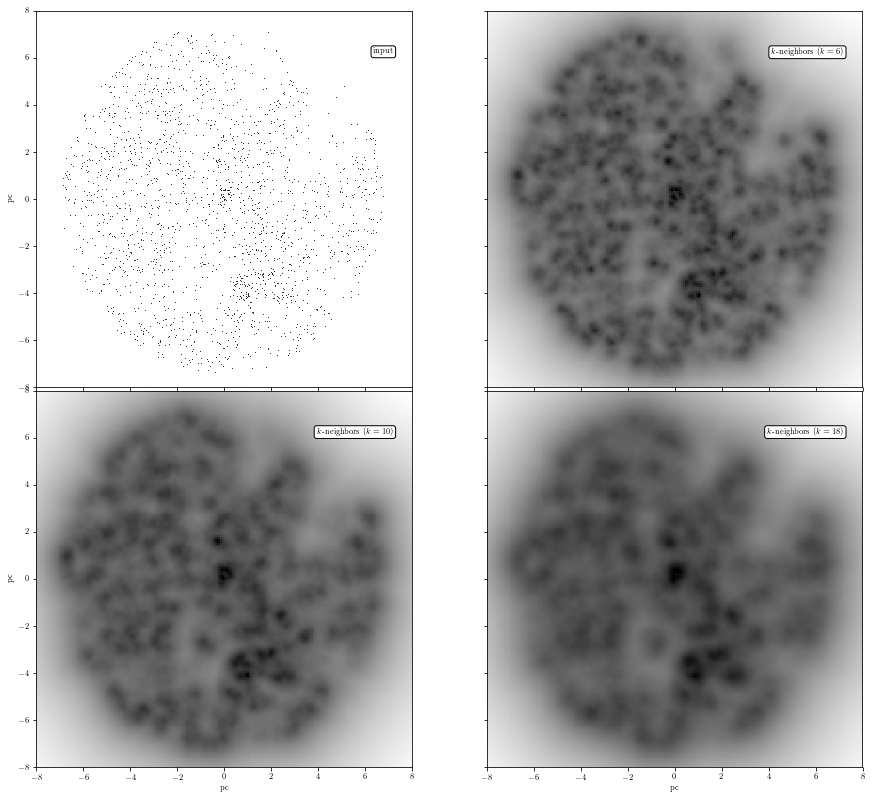

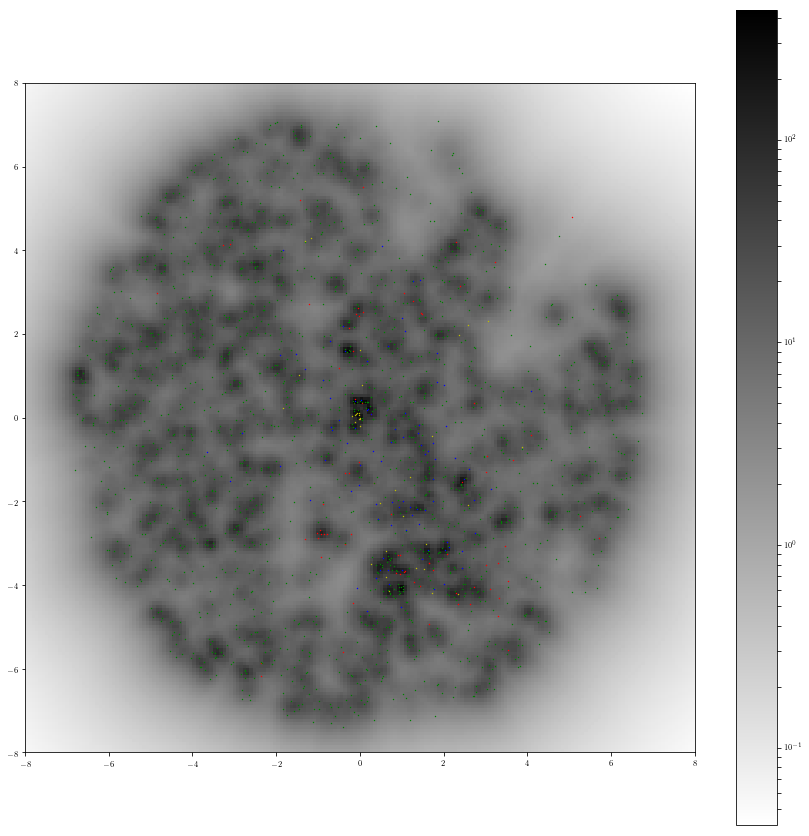

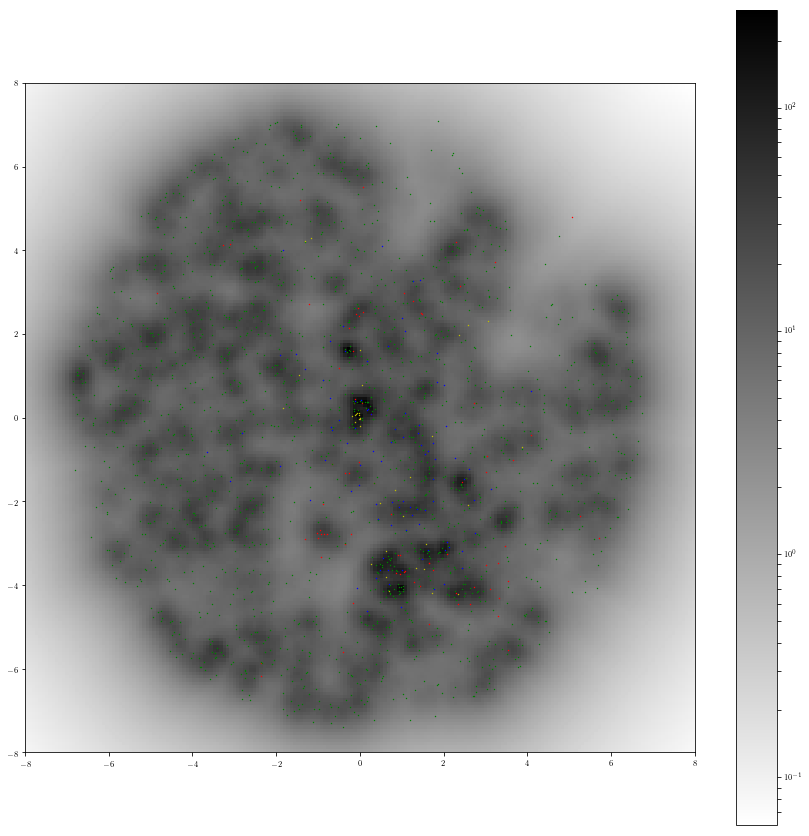

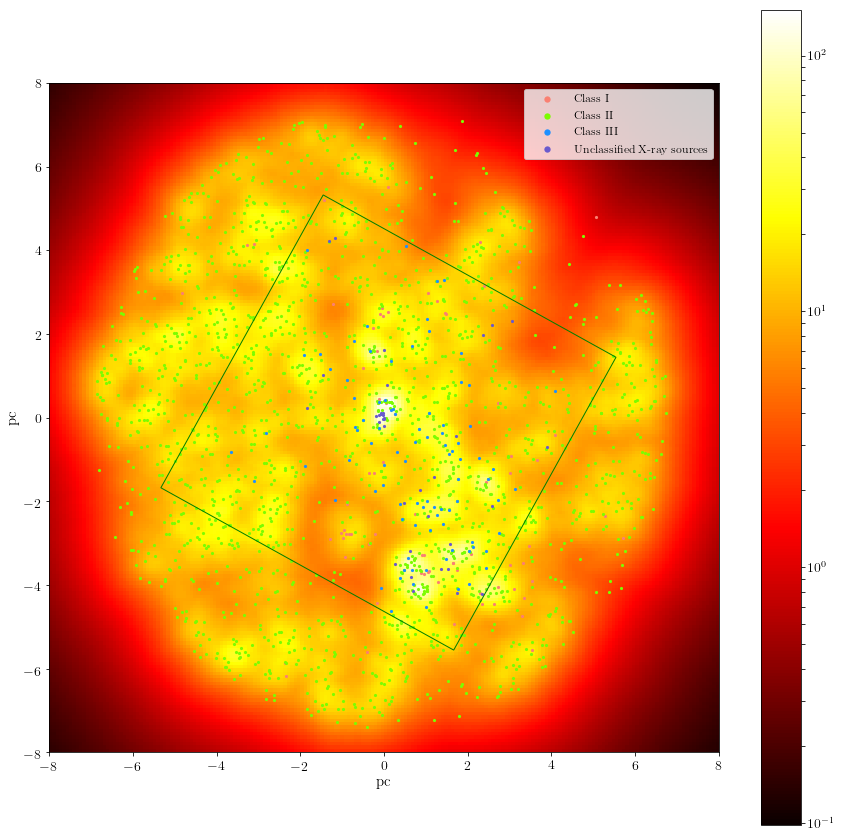

In [50]:
from matplotlib.colors import LogNorm
import matplotlib.patches as patches
import matplotlib as mpl

from scipy.spatial import cKDTree

from astroML.density_estimation import KDE, KNeighborsDensity

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Open the data
X = YSOs[['Dec_physical_coord','RA_physical_coord']]

#------------------------------------------------------------
# Create  the grid on which to evaluate the results
Nx = 200
Ny = 200
xmin, xmax = (-8, 8)
ymin, ymax = (-8, 8)

#------------------------------------------------------------
# Evaluate for several models
Xgrid = np.vstack(map(np.ravel, np.meshgrid(np.linspace(xmin, xmax, Nx),
                                            np.linspace(ymin, ymax, Ny)))).T

knn6 = KNeighborsDensity('bayesian', 6)
dens_k6 = knn6.fit(X).eval(Xgrid).reshape((Ny, Nx))

knn10 = KNeighborsDensity('bayesian', 10)
dens_k10 = knn10.fit(X).eval(Xgrid).reshape((Ny, Nx))

knn18 = KNeighborsDensity('bayesian', 18)
dens_k18 = knn18.fit(X).eval(Xgrid).reshape((Ny, Nx))

knn22 = KNeighborsDensity('bayesian', 22)
dens_k22 = knn22.fit(X).eval(Xgrid).reshape((Ny, Nx))

#------------------------------------------------------------
# Plot the results
fig = plt.figure(1,figsize=(15, 15))
fig.subplots_adjust(left=0.12, right=0.95, bottom=0.2, top=0.9,
                    hspace=0.01, wspace=0.01)

# First plot: scatter the points
ax1 = plt.subplot(221, aspect='equal')
ax1.scatter(YSOs['RA_physical_coord'], YSOs['Dec_physical_coord'], s=1, lw=0, c='k')
ax1.text(0.95, 0.9, "input", ha='right', va='top',
         transform=ax1.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))

# Second plot: KNN, k=6
ax2 = plt.subplot(222, aspect='equal')
ax2.imshow(dens_k6.T, origin='lower', norm=LogNorm(),
           extent=(ymin, ymax, xmin, xmax), cmap=plt.cm.binary)
ax2.text(0.95, 0.9, "$k$-neighbors $(k=6)$", ha='right', va='top',
         transform=ax2.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))

# Third plot: KNN, k=10
ax3 = plt.subplot(223, aspect='equal')
ax3.imshow(dens_k10.T, origin='lower', norm=LogNorm(),
           extent=(ymin, ymax, xmin, xmax), cmap=plt.cm.binary)
ax3.text(0.95, 0.9, "$k$-neighbors $(k=10)$", ha='right', va='top',
         transform=ax3.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))

# Fourth plot: KNN, k=18
ax4 = plt.subplot(224, aspect='equal')
ax4.imshow(dens_k18.T, origin='lower', norm=LogNorm(),
           extent=(ymin, ymax, xmin, xmax), cmap=plt.cm.binary)
ax4.text(0.95, 0.9, "$k$-neighbors $(k=18)$", ha='right', va='top',
         transform=ax4.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlim(ymin, ymax - 0.01)
    ax.set_ylim(xmin, xmax)

for ax in [ax1, ax2]:
    ax.xaxis.set_major_formatter(plt.NullFormatter())

for ax in [ax3, ax4]:
    ax.set_xlabel('pc')

for ax in [ax2, ax4]:
    ax.yaxis.set_major_formatter(plt.NullFormatter())

for ax in [ax1, ax3]:
    ax.set_ylabel('pc')


plt.figure(2, figsize=(15,15))
plt.scatter(all_class_I['RA_physical_coord'], all_class_I['Dec_physical_coord'], s=2, lw=0, c='r')
plt.scatter(all_class_II['RA_physical_coord'], all_class_II['Dec_physical_coord'], s=2, lw=0, c='g')
plt.scatter(X_ray_class_III['RA_physical_coord'], X_ray_class_III['Dec_physical_coord'], s=2, lw=0, c='b')
plt.scatter(X_ray_unclassified['RA_physical_coord'], X_ray_unclassified['Dec_physical_coord'], s=2, lw=0, c='y')
plt.imshow(dens_k6.T, origin='lower', norm=LogNorm(),
           extent=(ymin, ymax, xmin, xmax), cmap=plt.cm.binary)
plt.colorbar()
    #plt.text(0.95, 0.9, "$k$-neighbors $(k=6)$", ha='right', va='top',

plt.figure(3, figsize=(15,15))
plt.scatter(all_class_I['RA_physical_coord'], all_class_I['Dec_physical_coord'], s=2, lw=0, c='r')
plt.scatter(all_class_II['RA_physical_coord'], all_class_II['Dec_physical_coord'], s=2, lw=0, c='g')
plt.scatter(X_ray_class_III['RA_physical_coord'], X_ray_class_III['Dec_physical_coord'], s=2, lw=0, c='b')
plt.scatter(X_ray_unclassified['RA_physical_coord'], X_ray_unclassified['Dec_physical_coord'], s=2, lw=0, c='y')
plt.imshow(dens_k10.T, origin='lower', norm=LogNorm(),
           extent=(ymin, ymax, xmin, xmax), cmap=plt.cm.binary)
plt.colorbar()
    #plt.text(0.95, 0.9, "$k$-neighbors $(k=10)$", ha='right', va='top',

    
plt.figure(4, figsize=(15,15))
ax5 = plt.subplot(111)
ax5.scatter(all_class_I['RA_physical_coord'], all_class_I['Dec_physical_coord'], s=10, lw=0, c='salmon', label='Class I')
ax5.scatter(all_class_II['RA_physical_coord'], all_class_II['Dec_physical_coord'], s=10, lw=0, c='lawngreen', label='Class II')
ax5.scatter(X_ray_class_III['RA_physical_coord'], X_ray_class_III['Dec_physical_coord'], s=10, lw=0, c='dodgerblue', label='Class III')
ax5.scatter(X_ray_unclassified['RA_physical_coord'], X_ray_unclassified['Dec_physical_coord'], s=10, lw=0, c='slateblue', label='Unclassified X-ray sources')
hx = ax5.imshow(dens_k18.T, origin='lower', norm=LogNorm(),
           extent=(ymin, ymax, xmin, xmax), cmap=plt.cm.hot)
cb = plt.colorbar(hx)
cb.ax.tick_params(labelsize=14)
rect = patches.Rectangle((-3.85,-4.05),8,8, fill=False, edgecolor='g')
t = mpl.transforms.Affine2D().rotate_deg(331) + ax5.transData
rect.set_transform(t)
plt.gca().add_patch(rect)
plt.legend(scatterpoints=1, markerscale=2., fontsize=12, loc=1)
plt.xlabel('pc', fontsize = 15)
plt.ylabel('pc', fontsize = 15)
plt.tick_params(labelsize=14);
    #plt.text(0.95, 0.9, "$k$-neighbors $(k=18)$", ha='right', va='top',

## Cluster Membership Determination Using HDBSCAN

In [51]:
import seaborn as sns
import hdbscan
import warnings

In [52]:
# Implementing HDBSCAN with the below parameters
clusterer = hdbscan.HDBSCAN(min_cluster_size=13, min_samples=3, alpha=1.0,
                            cluster_selection_method='leaf',
                            gen_min_span_tree=True)

# Fitting the data to the model
clusterer.fit(X)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='leaf',
    core_dist_n_jobs=4, gen_min_span_tree=True, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=13, min_samples=3, p=None,
    prediction_data=False)

In [53]:
# Defining the color palette and applying to the clusters
color_pal = ['mediumseagreen','cornflowerblue','purple','paleturquoise',
             'yellowgreen','salmon','mediumvioletred',
             'rosybrown','darkcyan','olive','mediumblue',
             'lightskyblue','plum','darkorchid','cyan',
             'indigo','gold','red','palegreen','brown',
             'magenta','lime','orange','chocolate','linen','yellow',
             'coral','black','indianred','tan','pink','crimson']

pal = sns.color_palette(color_pal, 200)
colors = [sns.desaturate(pal[col], sat) for col, sat in zip(clusterer.labels_,
                                                            clusterer.probabilities_)]

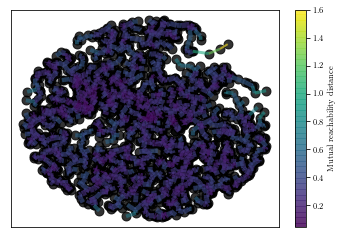

In [54]:
# Suppressing all warning messages
warnings.filterwarnings("ignore")

# Plotting the minimum spaning tree resulting from the HDBSCAN algorithm
plt.figure(1)
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2);

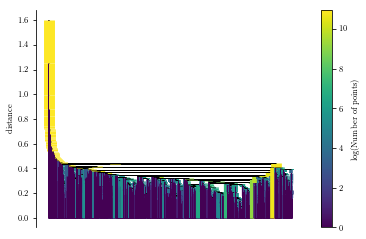

In [55]:
# Plotting the single linkage tree resulting from the HDBSCAN algorithm
plt.figure(2)
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True);

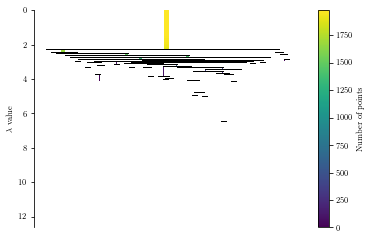

In [56]:
# Plotting the condensed tree resulting from the HDBSCAN algorithm
plt.figure(3)
clusterer.condensed_tree_.plot();

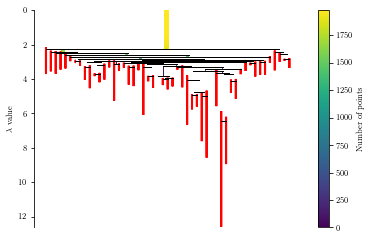

In [57]:
# Plotting the condensed tree with the selected clusters resulting from the HDBSCAN algorithm
plt.figure(4)
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette());

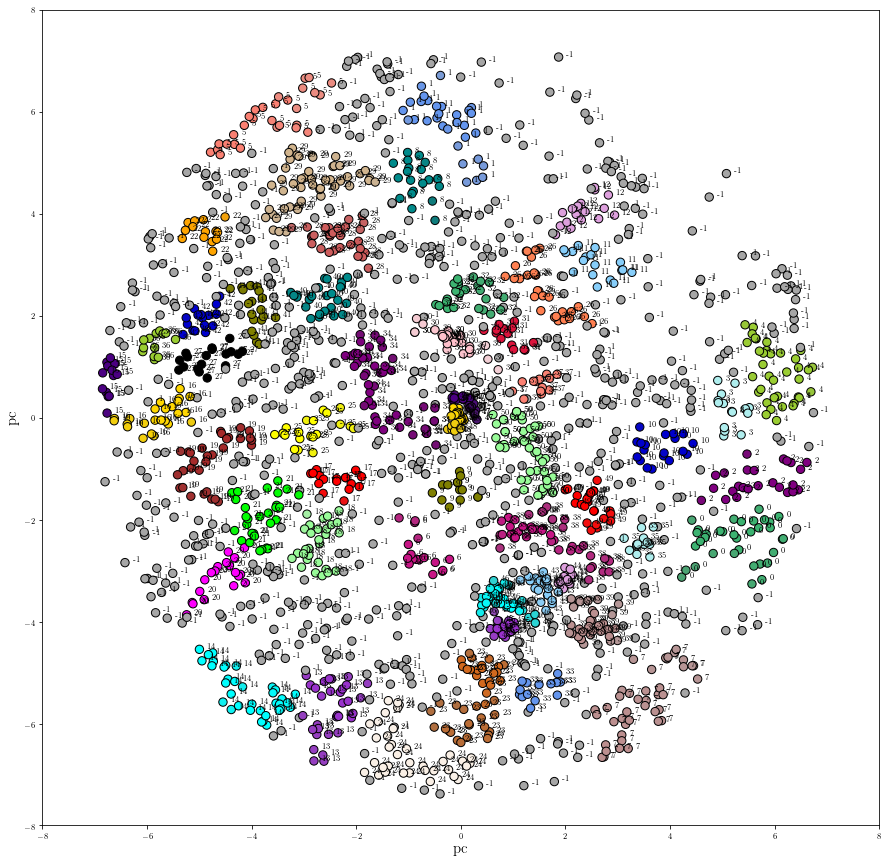

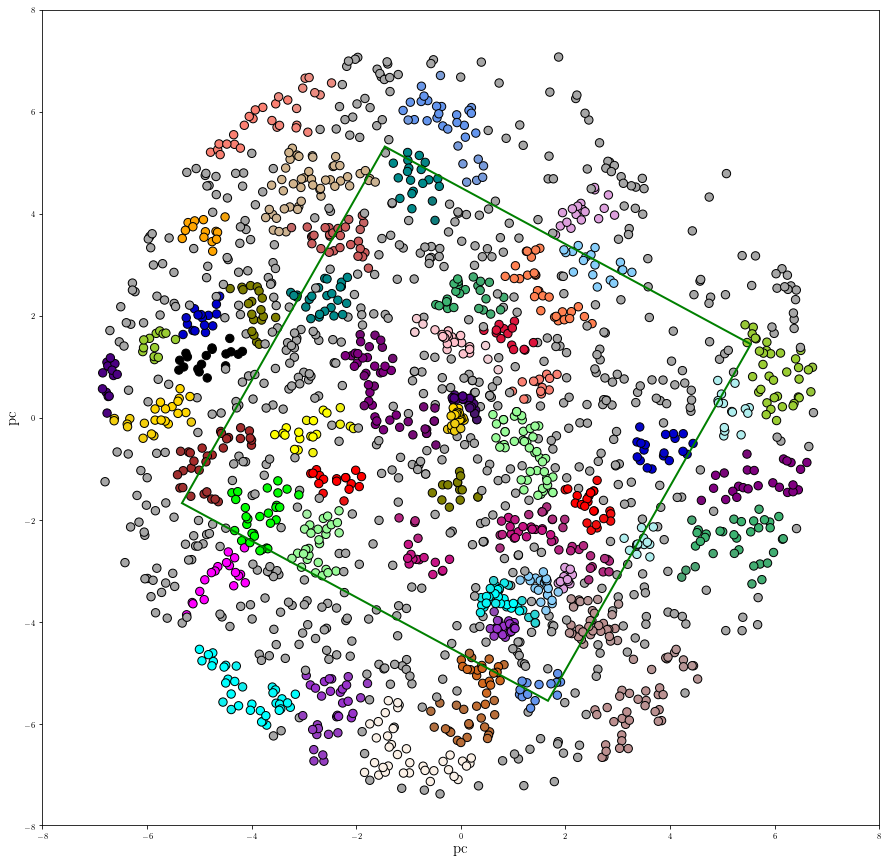

In [58]:
# Plotting the results of HDBSCAN clustering with color for each cluster
plt.figure(1, figsize=(15,15))
ax1 = plt.subplot(111)
ax1.scatter(YSOs['RA_physical_coord'], YSOs['Dec_physical_coord'], c=colors, edgecolor='k', s=70)
plt.xlabel('pc', fontsize = 15)
plt.ylabel('pc', fontsize = 15)
plt.xlim(-8,8)
plt.ylim(-8,8)

# Replotting the results of HDBSCAN clustering with color for each cluster adding the field-of-view
# of the Chandra X-Ray Telescope (green square)
plt.figure(2, figsize=(15,15))
ax2 = plt.subplot(111)
ax2.scatter(YSOs['RA_physical_coord'], YSOs['Dec_physical_coord'], c=colors, edgecolor='k', s=70)
rect = patches.Rectangle((-3.85,-4.05),8,8, fill=False, edgecolor='g', linewidth = 2)
t = mpl.transforms.Affine2D().rotate_deg(331) + ax2.transData
rect.set_transform(t)
plt.gca().add_patch(rect)
plt.xlabel('pc', fontsize = 15)
plt.ylabel('pc', fontsize = 15)
plt.xlim(-8,8)
plt.ylim(-8,8)

# Cluster label annotation
for i, txt in enumerate(clusterer.labels_):
    ax1.annotate(txt, (YSOs['RA_physical_coord'].iloc[i]+0.15, YSOs['Dec_physical_coord'].iloc[i]))

## We have 21 subclusters in the region:
- label 18
- label 17
- label 25
- label 34
- label 30
- label 32
- label 31
- label 48
- label 47
- label 50
- label 37
- label 49
- label 38
- label 44
- label 43
- label 45
- label 46
- label 10
- label 6
- label 9
- label 26

In [59]:
YSOs['J'] = YSOs['J'].astype(float)
YSOs['H'] = YSOs['H'].astype(float)

In [60]:
YSOs['(J-H)'] = YSOs['J'] - YSOs['H']
YSOs['(J-H)'].unique()

array([  nan,  0.8 ,  1.56,  1.82,  1.68,  1.48,  1.52,  1.19,  2.56,
        2.06,  1.31,  1.62,  0.94,  1.04,  1.03,  1.05,  1.58,  1.81,
        1.2 ,  1.34,  0.85,  3.31,  3.18,  1.65,  1.32,  1.63,  1.33,
        3.16,  3.69,  2.68,  1.96,  1.87,  3.48,  3.59,  4.  ,  1.83,
        2.2 ,  2.05,  2.54,  1.86,  1.71,  1.56,  2.11,  1.45,  3.16,
        2.48,  1.77,  3.11,  2.59,  1.67,  1.66,  0.89,  0.87,  1.59,
        1.14,  1.39,  0.78,  1.17,  0.84,  1.22,  2.67,  1.14,  1.08,
        0.97,  0.97,  1.16,  1.26,  1.21,  1.7 ,  1.  ,  2.34,  0.88,
        0.98,  0.67,  1.28,  1.09,  1.19,  2.28,  1.01,  1.49,  0.74,
        2.03,  1.45,  2.04,  1.56,  2.13,  2.12,  1.75,  1.25,  1.81,
        1.53,  1.08,  1.37,  1.46,  1.71,  1.54,  0.68,  1.47,  2.89,
        2.65,  3.53,  1.25,  1.1 ,  1.4 ,  1.82,  1.36,  3.19,  2.51,
        1.64,  4.06,  1.53,  1.86,  2.93,  1.02,  1.95,  2.19,  1.13,
        0.64,  1.3 ,  1.85,  1.12,  1.79,  1.51])

In [61]:
YSOs["hdbscan_labels"] = clusterer.labels_
YSOs.head()

,#Source #,#Source#,#src#,(H-4_5)+sigma(H-4_5),(J-H)+sigma(J-H),0.14/0.04*((color45_80-sigma3)-0.5)+0.5,1.4*(color45_58+sigma1-0.7)+0.15,Dec,H,H-[4.5],...,sourceID,tmass_designation,ymjPnt,ymjPntErr,zmyPnt,zmyPntErr,RA_physical_coord,Dec_physical_coord,(J-H),hdbscan_labels
232,NaN,NaN,255.0,NaN,NaN,3.5170,0.2298,-39.900678,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.077837,4.790432,NaN,-1
515,NaN,NaN,585.0,NaN,NaN,0.8080,0.2886,-40.096039,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.654951,-1.006040,NaN,10
597,NaN,NaN,683.0,NaN,NaN,4.2730,0.2746,-39.937041,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.218951,3.711521,NaN,-1
630,NaN,NaN,724.0,NaN,NaN,5.3685,0.3614,-40.092682,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.029858,-0.906436,NaN,-1
635,NaN,NaN,729.0,NaN,NaN,6.8350,1.3400,-40.106320,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.010066,-1.311083,NaN,-1


In [62]:
YSOs['hdbscan_labels'].value_counts().sort_index()

-1     677
 0      35
 1      31
 2      25
 3      15
 4      37
 5      29
 6      17
 7      42
 8      20
 9      14
 10     19
 11     18
 12     18
 13     33
 14     35
 15     14
 16     24
 17     17
 18     29
 19     31
 20     19
 21     29
 22     14
 23     42
 24     36
 25     20
 26     29
 27     18
 28     29
 29     48
 30     27
 31     14
 32     25
 33     14
 34     46
 35     13
 36     13
 37     13
 38     45
 39     34
 40     25
 41     19
 42     16
 43     21
 44     13
 45     22
 46     36
 47     26
 48     21
 49     25
 50     47
Name: hdbscan_labels, dtype: int64

In [63]:
list_hdbscan_labels = [18,17,25,34,30,32,31,48,47,50,37,49,38,44,43,45,46,10,6,9,26]
list_hdbscan_labels

[18,
 17,
 25,
 34,
 30,
 32,
 31,
 48,
 47,
 50,
 37,
 49,
 38,
 44,
 43,
 45,
 46,
 10,
 6,
 9,
 26]

In [64]:
clusters = []

for lab in list_hdbscan_labels: 
    clusters.append(YSOs[(YSOs["hdbscan_labels"]==lab)])

clusters[1]

,#Source #,#Source#,#src#,(H-4_5)+sigma(H-4_5),(J-H)+sigma(J-H),0.14/0.04*((color45_80-sigma3)-0.5)+0.5,1.4*(color45_58+sigma1-0.7)+0.15,Dec,H,H-[4.5],...,sourceID,tmass_designation,ymjPnt,ymjPntErr,zmyPnt,zmyPntErr,RA_physical_coord,Dec_physical_coord,(J-H),hdbscan_labels
1606,NaN,NaN,1841.0,NaN,NaN,2.4355,-0.0488,-40.101791,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-2.197698,-1.176705,NaN,17
2778,NaN,NaN,5010.0,2.259796,2.088575,NaN,NaN,-40.117172,NaN,2.417909,...,5.160000e+11,NaN,-1.000000e+09,-1.000000e+09,-1.000000e+09,-1.000000e+09,-2.232445,-1.633068,NaN,17
2831,NaN,NaN,5132.0,1.495078,1.360728,NaN,NaN,-40.105783,NaN,1.573417,...,5.160000e+11,17000541-4006207,1.561101e+00,2.007900e-02,1.421827e+00,4.258200e-02,-2.094765,-1.295150,NaN,17
2835,NaN,NaN,5141.0,2.076121,1.947338,NaN,NaN,-40.096874,NaN,2.188378,...,5.160000e+11,17000444-4005486,1.770792e+00,1.433850e-01,-1.000000e+09,-1.000000e+09,-2.009598,-1.030815,NaN,17
2839,NaN,NaN,5147.0,1.923431,1.783198,NaN,NaN,-40.109429,NaN,2.011754,...,5.160000e+11,17000588-4006338,2.408981e+00,1.230250e-01,-1.000000e+09,-1.000000e+09,-2.135575,-1.403329,NaN,17
2872,NaN,NaN,5207.0,1.743642,1.611432,NaN,NaN,-40.107665,NaN,1.861050,...,5.160000e+11,17000368-4006274,1.774319e+00,1.185720e-01,1.141296e+00,2.164550e-01,-1.940652,-1.350990,NaN,17
3146,NaN,NaN,5632.0,2.120681,2.023435,NaN,NaN,-40.102486,NaN,2.215312,...,5.160000e+11,17000857-4006089,2.607294e+00,2.142760e-01,-1.000000e+09,-1.000000e+09,-2.372469,-1.197326,NaN,17
3149,NaN,NaN,5636.0,2.406701,2.425370,NaN,NaN,-40.104124,NaN,2.542095,...,5.160000e+11,17000857-4006148,-1.000000e+09,-1.000000e+09,-1.000000e+09,-1.000000e+09,-2.372997,-1.245927,NaN,17
3153,NaN,NaN,5641.0,2.056825,1.774078,NaN,NaN,-40.099040,NaN,2.180751,...,5.160000e+11,17001421-4005563,2.161516e+00,1.849230e-01,-1.000000e+09,-1.000000e+09,-2.868225,-1.095081,NaN,17
3155,NaN,NaN,5644.0,1.674898,1.620496,NaN,NaN,-40.096495,NaN,1.756490,...,5.160000e+11,17001295-4005474,1.948074e+00,5.458100e-02,2.100912e+00,2.107210e-01,-2.758301,-1.019570,NaN,17


### Center of each subcluster

In [65]:
RA = []
Dec = []
RA_physical_coord = []
Dec_physical_coord = []
hdbscan_label = []


for c in clusters:
    RA.append(c['RA'].median())
    Dec.append(c['Dec'].median())
    RA_physical_coord.append(c['RA_physical_coord'].median())
    Dec_physical_coord.append(c['Dec_physical_coord'].median())
    hdbscan_label.append(c['hdbscan_labels'].unique())


clusters_center = pd.DataFrame({'RA': RA, 'Dec': Dec,
                                'RA_physical_coord': RA_physical_coord, 'Dec_physical_coord': Dec_physical_coord,
                                'hdbscan_label': hdbscan_label})
clusters_center

,Dec,Dec_physical_coord,RA,RA_physical_coord,hdbscan_label
0,-40.145376,-2.469897,255.052418,-2.725202,[18]
1,-40.102486,-1.197326,255.035719,-2.372469,[17]
2,-40.072077,-0.295089,255.058146,-2.846205,[25]
3,-40.040755,0.634268,255.000047,-1.618970,[34]
4,-40.008633,1.587346,254.934777,-0.240274,[30]
5,-39.982503,2.362638,254.924406,-0.021207,[32]
6,-40.006256,1.657888,254.879039,0.937079,[31]
7,-40.062236,-0.003086,254.927202,-0.080267,[48]
8,-40.050022,0.359296,254.915847,0.159595,[47]
9,-40.081582,-0.577093,254.863279,1.269977,[50]


In [66]:
clusters_center['hdbscan_label']

0     [18]
1     [17]
2     [25]
3     [34]
4     [30]
5     [32]
6     [31]
7     [48]
8     [47]
9     [50]
10    [37]
11    [49]
12    [38]
13    [44]
14    [43]
15    [45]
16    [46]
17    [10]
18     [6]
19     [9]
20    [26]
Name: hdbscan_label, dtype: object

In [67]:
clusters_center['hdbscan_label'] = (clusters_center['hdbscan_label']
                                    .replace("[","")
                                    .replace("]","")
                                    .astype(int)
                                   )

clusters_center

,Dec,Dec_physical_coord,RA,RA_physical_coord,hdbscan_label
0,-40.145376,-2.469897,255.052418,-2.725202,18
1,-40.102486,-1.197326,255.035719,-2.372469,17
2,-40.072077,-0.295089,255.058146,-2.846205,25
3,-40.040755,0.634268,255.000047,-1.618970,34
4,-40.008633,1.587346,254.934777,-0.240274,30
5,-39.982503,2.362638,254.924406,-0.021207,32
6,-40.006256,1.657888,254.879039,0.937079,31
7,-40.062236,-0.003086,254.927202,-0.080267,48
8,-40.050022,0.359296,254.915847,0.159595,47
9,-40.081582,-0.577093,254.863279,1.269977,50


In [68]:
clusters_center = clusters_center.sort_values('RA').reset_index(drop=True)
clusters_center

,Dec,Dec_physical_coord,RA,RA_physical_coord,hdbscan_label
0,-40.083460,-0.632814,254.739906,3.875981,10
1,-40.118585,-1.674993,254.805841,2.483238,49
2,-40.169149,-3.175255,254.826873,2.038980,44
3,-40.173536,-3.305420,254.846575,1.622815,43
4,-40.139403,-2.292675,254.848372,1.584857,38
5,-40.038415,0.703697,254.851119,1.526832,37
6,-39.978360,2.485563,254.852801,1.491303,26
7,-40.081582,-0.577093,254.863279,1.269977,50
8,-40.006256,1.657888,254.879039,0.937079,31
9,-40.201427,-4.132962,254.883815,0.836185,45


In [69]:
clusters_ID = [i for i in range(1,len(list_hdbscan_labels)+1)]
clusters_center['clusters_ID'] = clusters_ID
clusters_center

,Dec,Dec_physical_coord,RA,RA_physical_coord,hdbscan_label,clusters_ID
0,-40.083460,-0.632814,254.739906,3.875981,10,1
1,-40.118585,-1.674993,254.805841,2.483238,49,2
2,-40.169149,-3.175255,254.826873,2.038980,44,3
3,-40.173536,-3.305420,254.846575,1.622815,43,4
4,-40.139403,-2.292675,254.848372,1.584857,38,5
5,-40.038415,0.703697,254.851119,1.526832,37,6
6,-39.978360,2.485563,254.852801,1.491303,26,7
7,-40.081582,-0.577093,254.863279,1.269977,50,8
8,-40.006256,1.657888,254.879039,0.937079,31,9
9,-40.201427,-4.132962,254.883815,0.836185,45,10


In [70]:
cols = ['clusters_ID', 'hdbscan_label', 'RA', 'Dec', 'RA_physical_coord', 'Dec_physical_coord']
clusters_center = clusters_center[cols]
clusters_center

,clusters_ID,hdbscan_label,RA,Dec,RA_physical_coord,Dec_physical_coord
0,1,10,254.739906,-40.083460,3.875981,-0.632814
1,2,49,254.805841,-40.118585,2.483238,-1.674993
2,3,44,254.826873,-40.169149,2.038980,-3.175255
3,4,43,254.846575,-40.173536,1.622815,-3.305420
4,5,38,254.848372,-40.139403,1.584857,-2.292675
5,6,37,254.851119,-40.038415,1.526832,0.703697
6,7,26,254.852801,-39.978360,1.491303,2.485563
7,8,50,254.863279,-40.081582,1.269977,-0.577093
8,9,31,254.879039,-40.006256,0.937079,1.657888
9,10,45,254.883815,-40.201427,0.836185,-4.132962


In [71]:
new_list_hdbscan_labels = clusters_center['hdbscan_label'].tolist()
new_list_hdbscan_labels

[10,
 49,
 44,
 43,
 38,
 37,
 26,
 50,
 31,
 45,
 46,
 47,
 32,
 9,
 48,
 30,
 6,
 34,
 17,
 18,
 25]

In [72]:
new_clusters = []

for lab in new_list_hdbscan_labels: 
    new_clusters.append(YSOs[(YSOs["hdbscan_labels"]==lab)])

new_clusters[1]

,#Source #,#Source#,#src#,(H-4_5)+sigma(H-4_5),(J-H)+sigma(J-H),0.14/0.04*((color45_80-sigma3)-0.5)+0.5,1.4*(color45_58+sigma1-0.7)+0.15,Dec,H,H-[4.5],...,sourceID,tmass_designation,ymjPnt,ymjPntErr,zmyPnt,zmyPntErr,RA_physical_coord,Dec_physical_coord,(J-H),hdbscan_labels
5068,NaN,NaN,9238.0,3.628147,1.872272,NaN,NaN,-40.114013,NaN,3.758979,...,5.160000e+11,16591382-4006504,2.813944e+00,1.375240e-01,-1.000000e+09,-1.000000e+09,2.446928,-1.539339,NaN,49
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-40.110538,12.07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.540783,-1.436228,0.80,49
732,NaN,NaN,845.0,NaN,NaN,2.7890,-0.3092,-40.110696,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.538369,-1.440922,NaN,49
744,NaN,NaN,860.0,NaN,NaN,5.9355,0.1332,-40.111694,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.483238,-1.470533,NaN,49
754,NaN,NaN,871.0,NaN,NaN,2.3760,-0.0446,-40.116096,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.418137,-1.601143,NaN,49
792,NaN,NaN,916.0,NaN,NaN,3.7095,-0.0446,-40.113654,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.224503,-1.528687,NaN,49
6,NaN,NaN,9.0,2.140812,1.521312,NaN,NaN,-40.134979,NaN,2.268847,...,5.160000e+11,NaN,1.242235e+00,6.136000e-02,1.321749e+00,1.147250e-01,2.605709,-2.161412,NaN,49
7,NaN,NaN,10.0,1.666245,1.335501,NaN,NaN,-40.136562,NaN,1.756372,...,5.160000e+11,16591329-4008116,1.470659e+00,2.693100e-02,1.497101e+00,5.866000e-02,2.492131,-2.208380,NaN,49
34,NaN,NaN,58.0,1.733807,1.652174,NaN,NaN,-40.123815,NaN,1.821861,...,5.160000e+11,NaN,1.800648e+00,5.249100e-02,2.057003e+00,1.854400e-01,2.850693,-1.830170,NaN,49
36,NaN,NaN,61.0,1.832513,1.437799,NaN,NaN,-40.125725,NaN,1.981637,...,5.160000e+11,NaN,1.605923e+00,6.975300e-02,1.390997e+00,1.443530e-01,2.866177,-1.886841,NaN,49


In [73]:
new_clusters[1].columns

Index(['#Source #', '#Source#', '#src#', '(H-4_5)+sigma(H-4_5)',
       '(J-H)+sigma(J-H)', '0.14/0.04*((color45_80-sigma3)-0.5)+0.5',
       '1.4*(color45_58+sigma1-0.7)+0.15', 'Dec', 'H', 'H-[4.5]',
       ...
       'sourceID', 'tmass_designation', 'ymjPnt', 'ymjPntErr', 'zmyPnt',
       'zmyPntErr', 'RA_physical_coord', 'Dec_physical_coord', '(J-H)',
       'hdbscan_labels'],
      dtype='object', length=109)

### Replotting HDBSCAN with clusters names

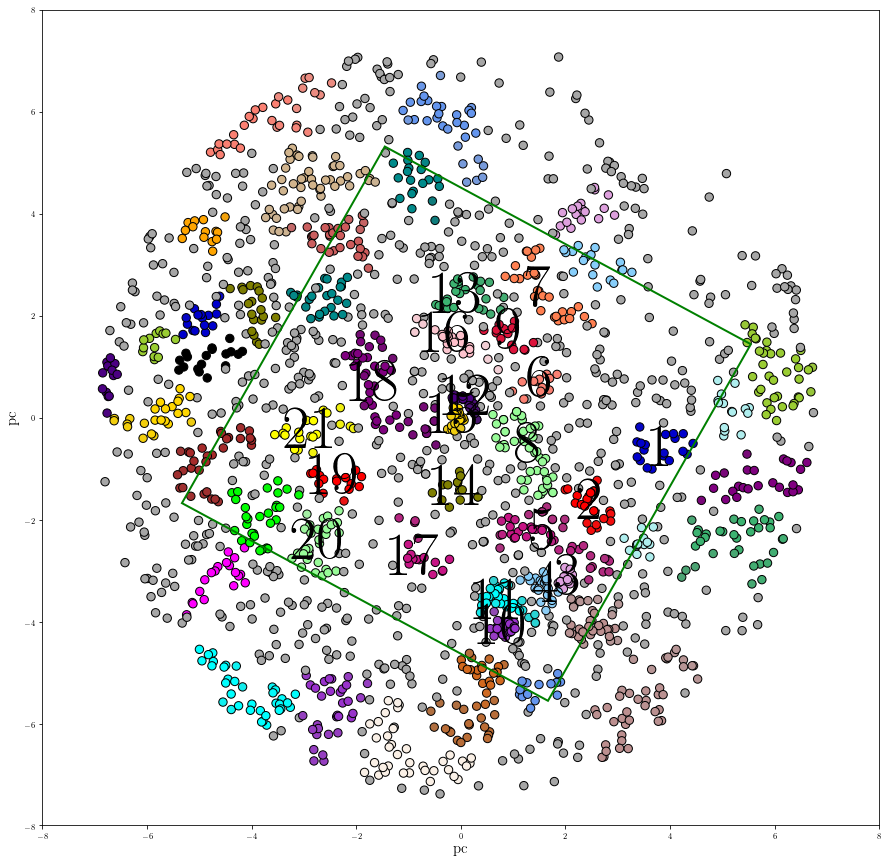

In [74]:
# Replotting the results of HDBSCAN clustering with color for each cluster adding the field-of-view
# of the Chandra X-Ray Telescope (green square)
plt.figure(1, figsize=(15,15))
ax1 = plt.subplot(111)
ax1.scatter(YSOs['RA_physical_coord'], YSOs['Dec_physical_coord'], c=colors, edgecolor='k', s=70)
rect = patches.Rectangle((-3.85,-4.05),8,8, fill=False, edgecolor='g', linewidth = 2)
t = mpl.transforms.Affine2D().rotate_deg(331) + ax1.transData
rect.set_transform(t)
plt.gca().add_patch(rect)
plt.xlabel('pc', fontsize = 15)
plt.ylabel('pc', fontsize = 15)
plt.xlim(-8,8)
plt.ylim(-8,8)


# Cluster label annotation
for i, txt in enumerate(clusters_ID):
    ax1.annotate(txt, (clusters_center['RA_physical_coord'].iloc[i], clusters_center['Dec_physical_coord'].iloc[i]),
                 ha="center", va="center", size=60, fontweight='bold')

## Convex Hull

Cluster 1  = 3.055 pc-squared
Cluster 2  = 2.836 pc-squared
Cluster 3  = 1.047 pc-squared
Cluster 4  = 2.170 pc-squared
Cluster 5  = 5.480 pc-squared
Cluster 6  = 2.078 pc-squared
Cluster 7  = 4.678 pc-squared
Cluster 8  = 4.498 pc-squared
Cluster 9  = 2.284 pc-squared
Cluster 10  = 1.528 pc-squared
Cluster 11  = 3.009 pc-squared
Cluster 12  = 1.619 pc-squared
Cluster 13  = 3.212 pc-squared
Cluster 14  = 2.288 pc-squared
Cluster 15  = 1.230 pc-squared
Cluster 16  = 3.982 pc-squared
Cluster 17  = 3.200 pc-squared
Cluster 18  = 6.046 pc-squared
Cluster 19  = 2.537 pc-squared
Cluster 20  = 3.676 pc-squared
Cluster 21  = 3.598 pc-squared


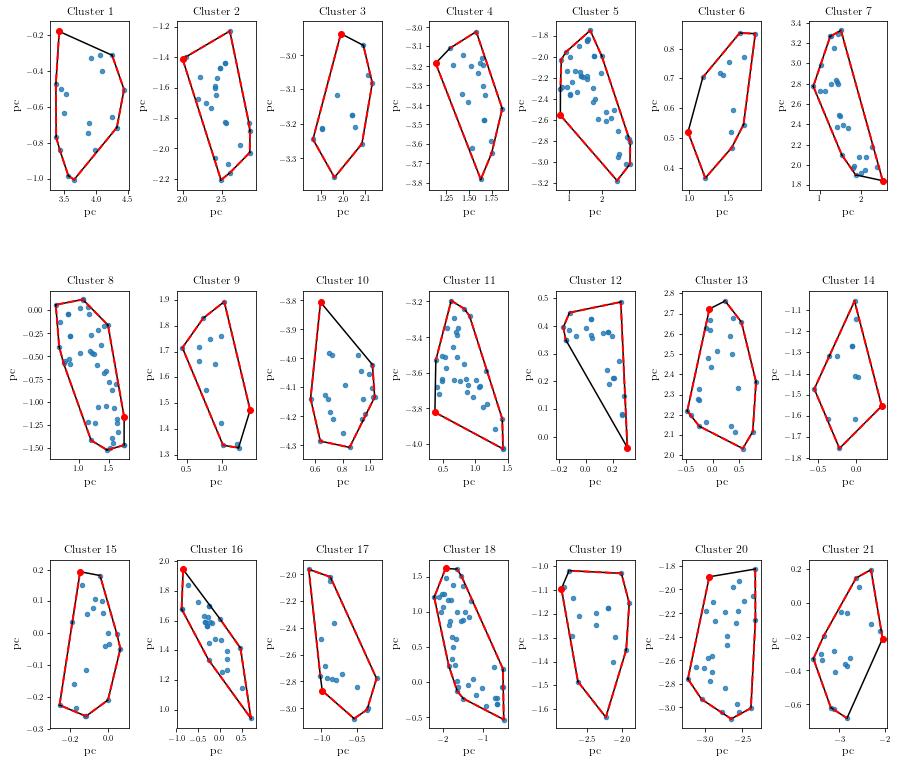

In [75]:
from scipy.spatial import ConvexHull

hull_area = []

# Defining the figure dimensions
fig = plt.figure(7, figsize=(15, 13))
fig.subplots_adjust(hspace=0.6, wspace=0.6)

# Looping through letters, and also using enumerate to index
for i, cl in enumerate(new_clusters):
    # Applying the Convex Hull algorithm on the data
    data = cl[['RA_physical_coord','Dec_physical_coord']].values
    hull = ConvexHull(data)
    # Printing the area for each subcluster
    print('Cluster',clusters_ID[i],' = %.3f pc-squared' %hull.area)
    
    # Append Hull area in a list
    hull_area.append(hull.area)

    # Plotting the Convex Hull for each subcluster
    i+=1
    ax = fig.add_subplot(3, len(list_hdbscan_labels)/3, i)
    ax.scatter(data[:,0], data[:,1], alpha=0.8, s=20)

    for simplex in hull.simplices:
        ax.plot(data[simplex, 0], data[simplex, 1], 'k-')

    ax.plot(data[hull.vertices,0], data[hull.vertices,1], 'r--', lw=2)
    ax.plot(data[hull.vertices[0],0], data[hull.vertices[0],1], 'ro')

    ax.set_title('Cluster %s' %clusters_ID[i-1], fontsize=12)
    ax.set_xlabel('pc', fontsize=12)
    ax.set_ylabel('pc', fontsize=12);

In [76]:
hull_area

[3.054603557146385,
 2.8363098742648924,
 1.046924261540859,
 2.1702111925286487,
 5.4804724517055625,
 2.078128128578659,
 4.677908528099204,
 4.498246521013806,
 2.2842585696446016,
 1.528090782620723,
 3.0088400308422587,
 1.619025091709594,
 3.212353099285807,
 2.2882920344786593,
 1.2301793070774543,
 3.9819740082499933,
 3.1996792767423203,
 6.046054084982224,
 2.5370093343048428,
 3.67571947634627,
 3.5980066699452484]

In [77]:
clusters_center['hull_area_pc_sq'] = hull_area
clusters_center

,clusters_ID,hdbscan_label,RA,Dec,RA_physical_coord,Dec_physical_coord,hull_area_pc_sq
0,1,10,254.739906,-40.083460,3.875981,-0.632814,3.054604
1,2,49,254.805841,-40.118585,2.483238,-1.674993,2.836310
2,3,44,254.826873,-40.169149,2.038980,-3.175255,1.046924
3,4,43,254.846575,-40.173536,1.622815,-3.305420,2.170211
4,5,38,254.848372,-40.139403,1.584857,-2.292675,5.480472
5,6,37,254.851119,-40.038415,1.526832,0.703697,2.078128
6,7,26,254.852801,-39.978360,1.491303,2.485563,4.677909
7,8,50,254.863279,-40.081582,1.269977,-0.577093,4.498247
8,9,31,254.879039,-40.006256,0.937079,1.657888,2.284259
9,10,45,254.883815,-40.201427,0.836185,-4.132962,1.528091


In [78]:
clusters_tot_YSOs = []

for i in new_clusters:
    clusters_tot_YSOs.append(i.shape[0])
    
clusters_tot_YSOs

[19,
 25,
 13,
 21,
 45,
 13,
 29,
 47,
 14,
 22,
 36,
 26,
 25,
 14,
 21,
 27,
 17,
 46,
 17,
 29,
 20]

In [79]:
clusters_center['tot_YSOs'] = clusters_tot_YSOs
clusters_center

,clusters_ID,hdbscan_label,RA,Dec,RA_physical_coord,Dec_physical_coord,hull_area_pc_sq,tot_YSOs
0,1,10,254.739906,-40.083460,3.875981,-0.632814,3.054604,19
1,2,49,254.805841,-40.118585,2.483238,-1.674993,2.836310,25
2,3,44,254.826873,-40.169149,2.038980,-3.175255,1.046924,13
3,4,43,254.846575,-40.173536,1.622815,-3.305420,2.170211,21
4,5,38,254.848372,-40.139403,1.584857,-2.292675,5.480472,45
5,6,37,254.851119,-40.038415,1.526832,0.703697,2.078128,13
6,7,26,254.852801,-39.978360,1.491303,2.485563,4.677909,29
7,8,50,254.863279,-40.081582,1.269977,-0.577093,4.498247,47
8,9,31,254.879039,-40.006256,0.937079,1.657888,2.284259,14
9,10,45,254.883815,-40.201427,0.836185,-4.132962,1.528091,22


In [80]:
classes_dict = {}


# dict(cluster_A['class'].value_counts())
for m, i in enumerate(new_clusters):
    classes_dict[m] = dict(i.pivot_table(index='class', aggfunc={'hdbscan_labels':'count'}).reset_index().values.tolist())

classes_dict

{0: {'1': 2, '2': 16, 'unclass': 1},
 1: {'1': 2, '2': 19, '3': 3, 'unclass': 1},
 2: {'1': 1, '2': 9, '3': 3},
 3: {'1': 3, '2': 14, '3': 2, 'unclass': 2},
 4: {'1': 1, '2': 32, '3': 11, 'unclass': 1},
 5: {'2': 12, '3': 1},
 6: {'1': 4, '2': 22, '3': 2, 'unclass': 1},
 7: {'2': 36, '3': 10, 'unclass': 1},
 8: {'2': 13, '3': 1},
 9: {'2': 19, '3': 1, 'unclass': 2},
 10: {'1': 7, '2': 23, '3': 5, 'unclass': 1},
 11: {'1': 4, '2': 17, '3': 5},
 12: {'1': 5, '2': 19, '3': 1},
 13: {'1': 4, '2': 7, '3': 3},
 14: {'2': 9, '3': 1, 'unclass': 11},
 15: {'1': 1, '2': 22, '3': 3, 'unclass': 1},
 16: {'1': 9, '2': 7, '3': 1},
 17: {'2': 38, '3': 6, 'unclass': 2},
 18: {'2': 16, '3': 1},
 19: {'2': 29},
 20: {'2': 19, '3': 1}}

In [81]:
df = pd.DataFrame.from_dict(classes_dict, orient='index').astype(float)
df.columns = ['class_1', 'class_2', 'class_3', 'unclassified']
df = df.fillna(0)
df

,class_1,class_2,class_3,unclassified
0,2.0,16.0,1.0,0.0
1,2.0,19.0,1.0,3.0
2,1.0,9.0,0.0,3.0
3,3.0,14.0,2.0,2.0
4,1.0,32.0,1.0,11.0
5,0.0,12.0,0.0,1.0
6,4.0,22.0,1.0,2.0
7,0.0,36.0,1.0,10.0
8,0.0,13.0,0.0,1.0
9,0.0,19.0,2.0,1.0


In [82]:
clusters_info = clusters_center.merge(df, left_index=True, right_index=True)
clusters_info

,clusters_ID,hdbscan_label,RA,Dec,RA_physical_coord,Dec_physical_coord,hull_area_pc_sq,tot_YSOs,class_1,class_2,class_3,unclassified
0,1,10,254.739906,-40.083460,3.875981,-0.632814,3.054604,19,2.0,16.0,1.0,0.0
1,2,49,254.805841,-40.118585,2.483238,-1.674993,2.836310,25,2.0,19.0,1.0,3.0
2,3,44,254.826873,-40.169149,2.038980,-3.175255,1.046924,13,1.0,9.0,0.0,3.0
3,4,43,254.846575,-40.173536,1.622815,-3.305420,2.170211,21,3.0,14.0,2.0,2.0
4,5,38,254.848372,-40.139403,1.584857,-2.292675,5.480472,45,1.0,32.0,1.0,11.0
5,6,37,254.851119,-40.038415,1.526832,0.703697,2.078128,13,0.0,12.0,0.0,1.0
6,7,26,254.852801,-39.978360,1.491303,2.485563,4.677909,29,4.0,22.0,1.0,2.0
7,8,50,254.863279,-40.081582,1.269977,-0.577093,4.498247,47,0.0,36.0,1.0,10.0
8,9,31,254.879039,-40.006256,0.937079,1.657888,2.284259,14,0.0,13.0,0.0,1.0
9,10,45,254.883815,-40.201427,0.836185,-4.132962,1.528091,22,0.0,19.0,2.0,1.0


In [83]:
clusters_info['class_2/class_1'] = clusters_info['class_2'] / clusters_info['class_1']
clusters_info['class_3/class_2'] = clusters_info['class_3'] / clusters_info['class_2']
clusters_info

,clusters_ID,hdbscan_label,RA,Dec,RA_physical_coord,Dec_physical_coord,hull_area_pc_sq,tot_YSOs,class_1,class_2,class_3,unclassified,class_2/class_1,class_3/class_2
0,1,10,254.739906,-40.083460,3.875981,-0.632814,3.054604,19,2.0,16.0,1.0,0.0,8.000000,0.062500
1,2,49,254.805841,-40.118585,2.483238,-1.674993,2.836310,25,2.0,19.0,1.0,3.0,9.500000,0.052632
2,3,44,254.826873,-40.169149,2.038980,-3.175255,1.046924,13,1.0,9.0,0.0,3.0,9.000000,0.000000
3,4,43,254.846575,-40.173536,1.622815,-3.305420,2.170211,21,3.0,14.0,2.0,2.0,4.666667,0.142857
4,5,38,254.848372,-40.139403,1.584857,-2.292675,5.480472,45,1.0,32.0,1.0,11.0,32.000000,0.031250
5,6,37,254.851119,-40.038415,1.526832,0.703697,2.078128,13,0.0,12.0,0.0,1.0,inf,0.000000
6,7,26,254.852801,-39.978360,1.491303,2.485563,4.677909,29,4.0,22.0,1.0,2.0,5.500000,0.045455
7,8,50,254.863279,-40.081582,1.269977,-0.577093,4.498247,47,0.0,36.0,1.0,10.0,inf,0.027778
8,9,31,254.879039,-40.006256,0.937079,1.657888,2.284259,14,0.0,13.0,0.0,1.0,inf,0.000000
9,10,45,254.883815,-40.201427,0.836185,-4.132962,1.528091,22,0.0,19.0,2.0,1.0,inf,0.105263


In [84]:
clusters_info['R_in_pc'] = sqrt(clusters_info['hull_area_pc_sq']/pi)
clusters_info['surf_area_per_pc_sq'] = clusters_info['tot_YSOs']/clusters_info['hull_area_pc_sq']

In [85]:
clusters_info.columns

Index(['clusters_ID', 'hdbscan_label', 'RA', 'Dec', 'RA_physical_coord',
       'Dec_physical_coord', 'hull_area_pc_sq', 'tot_YSOs', 'class_1',
       'class_2', 'class_3', 'unclassified', 'class_2/class_1',
       'class_3/class_2', 'R_in_pc', 'surf_area_per_pc_sq'],
      dtype='object')

In [86]:
new_cols = ['clusters_ID', 'hdbscan_label', 'RA', 'Dec', 'RA_physical_coord',
       'Dec_physical_coord', 'hull_area_pc_sq', 'R_in_pc', 'surf_area_per_pc_sq', 'tot_YSOs', 'class_1',
       'class_2', 'class_3', 'unclassified', 'class_2/class_1',
       'class_3/class_2']
clusters_info = clusters_info[new_cols]

In [87]:
clusters_info

,clusters_ID,hdbscan_label,RA,Dec,RA_physical_coord,Dec_physical_coord,hull_area_pc_sq,R_in_pc,surf_area_per_pc_sq,tot_YSOs,class_1,class_2,class_3,unclassified,class_2/class_1,class_3/class_2
0,1,10,254.739906,-40.083460,3.875981,-0.632814,3.054604,0.986058,6.220120,19,2.0,16.0,1.0,0.0,8.000000,0.062500
1,2,49,254.805841,-40.118585,2.483238,-1.674993,2.836310,0.950171,8.814270,25,2.0,19.0,1.0,3.0,9.500000,0.052632
2,3,44,254.826873,-40.169149,2.038980,-3.175255,1.046924,0.577275,12.417326,13,1.0,9.0,0.0,3.0,9.000000,0.000000
3,4,43,254.846575,-40.173536,1.622815,-3.305420,2.170211,0.831144,9.676478,21,3.0,14.0,2.0,2.0,4.666667,0.142857
4,5,38,254.848372,-40.139403,1.584857,-2.292675,5.480472,1.320791,8.210971,45,1.0,32.0,1.0,11.0,32.000000,0.031250
5,6,37,254.851119,-40.038415,1.526832,0.703697,2.078128,0.813320,6.255630,13,0.0,12.0,0.0,1.0,inf,0.000000
6,7,26,254.852801,-39.978360,1.491303,2.485563,4.677909,1.220256,6.199352,29,4.0,22.0,1.0,2.0,5.500000,0.045455
7,8,50,254.863279,-40.081582,1.269977,-0.577093,4.498247,1.196594,10.448516,47,0.0,36.0,1.0,10.0,inf,0.027778
8,9,31,254.879039,-40.006256,0.937079,1.657888,2.284259,0.852703,6.128903,14,0.0,13.0,0.0,1.0,inf,0.000000
9,10,45,254.883815,-40.201427,0.836185,-4.132962,1.528091,0.697428,14.397050,22,0.0,19.0,2.0,1.0,inf,0.105263


In [88]:
clusters_age = clusters_info[['clusters_ID','tot_YSOs']]
clusters_age

,clusters_ID,tot_YSOs
0,1,19
1,2,25
2,3,13
3,4,21
4,5,45
5,6,13
6,7,29
7,8,47
8,9,14
9,10,22


In [89]:
clusters_N_age = []

for i in range(21):
    clusters_N_age.append(new_clusters[i]['(J-H)'].dropna().value_counts().sum())

clusters_N_age

[nan, 6, 3, 5, 13, 1, 2, 12, 1, 1, 8, 11, 2, 6, 6, 8, 1, 8, 2, nan, 1]

In [90]:
clusters_age['N_age'] = clusters_N_age
clusters_age

,clusters_ID,tot_YSOs,N_age
0,1,19,NaN
1,2,25,6.0
2,3,13,3.0
3,4,21,5.0
4,5,45,13.0
5,6,13,1.0
6,7,29,2.0
7,8,47,12.0
8,9,14,1.0
9,10,22,1.0


In [91]:
clusters_median_J_H = []

for i in range(21):
    clusters_median_J_H.append(new_clusters[i]['(J-H)'].median())
    
clusters_median_J_H

[nan,
 1.2649999999999997,
 1.2199999999999989,
 1.8099999999999987,
 1.1999999999999993,
 1.08,
 0.915,
 1.504999999999999,
 1.25,
 1.6600000000000001,
 1.7200000000000006,
 1.870000000000001,
 2.3999999999999995,
 1.580000000000001,
 2.6950000000000003,
 1.9399999999999995,
 1.1300000000000026,
 1.7599999999999998,
 1.415,
 nan,
 1.120000000000001]

In [92]:
clusters_age['median_J-H'] = clusters_median_J_H
clusters_age

,clusters_ID,tot_YSOs,N_age,median_J-H
0,1,19,NaN,NaN
1,2,25,6.0,1.265
2,3,13,3.0,1.220
3,4,21,5.0,1.810
4,5,45,13.0,1.200
5,6,13,1.0,1.080
6,7,29,2.0,0.915
7,8,47,12.0,1.505
8,9,14,1.0,1.250
9,10,22,1.0,1.660


In [93]:
clusters_age.loc[(clusters_age['median_J-H'] < 1.7) & (clusters_age['median_J-H'] > 0.5), 'median_age'] = 4.00-1.71*(clusters_age['median_J-H'])
clusters_age.loc[(clusters_age['median_J-H'] > 1.7) & (clusters_age['median_J-H'] < 3.5), 'median_age'] = 1.77-0.40*(clusters_age['median_J-H'])

clusters_age

,clusters_ID,tot_YSOs,N_age,median_J-H,median_age
0,1,19,NaN,NaN,NaN
1,2,25,6.0,1.265,1.83685
2,3,13,3.0,1.220,1.91380
3,4,21,5.0,1.810,1.04600
4,5,45,13.0,1.200,1.94800
5,6,13,1.0,1.080,2.15320
6,7,29,2.0,0.915,2.43535
7,8,47,12.0,1.505,1.42645
8,9,14,1.0,1.250,1.86250
9,10,22,1.0,1.660,1.16140


In [94]:
clusters_N_disk = []

for i in range(21):
    clusters_N_disk.append((new_clusters[i][((new_clusters[i]['class'] == '1') | (new_clusters[i]['class'] == '2'))]).shape[0])

clusters_N_disk

[18,
 21,
 10,
 17,
 33,
 12,
 26,
 36,
 13,
 19,
 30,
 21,
 24,
 11,
 9,
 23,
 16,
 38,
 16,
 29,
 19]

In [95]:
clusters_age['N_disk'] = clusters_N_disk
clusters_age

,clusters_ID,tot_YSOs,N_age,median_J-H,median_age,N_disk
0,1,19,NaN,NaN,NaN,18
1,2,25,6.0,1.265,1.83685,21
2,3,13,3.0,1.220,1.91380,10
3,4,21,5.0,1.810,1.04600,17
4,5,45,13.0,1.200,1.94800,33
5,6,13,1.0,1.080,2.15320,12
6,7,29,2.0,0.915,2.43535,26
7,8,47,12.0,1.505,1.42645,36
8,9,14,1.0,1.250,1.86250,13
9,10,22,1.0,1.660,1.16140,19


In [96]:
clusters_N_diskless = []

for i in range(21):
    clusters_N_diskless.append((new_clusters[i]['class'] == '3').sum())

clusters_N_diskless

[0, 3, 3, 2, 11, 1, 2, 10, 1, 1, 5, 5, 1, 3, 1, 3, 1, 6, 1, 0, 1]

In [97]:
clusters_age['N_diskless'] = clusters_N_diskless
clusters_age

,clusters_ID,tot_YSOs,N_age,median_J-H,median_age,N_disk,N_diskless
0,1,19,NaN,NaN,NaN,18,0
1,2,25,6.0,1.265,1.83685,21,3
2,3,13,3.0,1.220,1.91380,10,3
3,4,21,5.0,1.810,1.04600,17,2
4,5,45,13.0,1.200,1.94800,33,11
5,6,13,1.0,1.080,2.15320,12,1
6,7,29,2.0,0.915,2.43535,26,2
7,8,47,12.0,1.505,1.42645,36,10
8,9,14,1.0,1.250,1.86250,13,1
9,10,22,1.0,1.660,1.16140,19,1


In [98]:
clusters_age['N_disk_frac'] = clusters_age['N_disk'] + clusters_age['N_diskless']
clusters_age

,clusters_ID,tot_YSOs,N_age,median_J-H,median_age,N_disk,N_diskless,N_disk_frac
0,1,19,NaN,NaN,NaN,18,0,18
1,2,25,6.0,1.265,1.83685,21,3,24
2,3,13,3.0,1.220,1.91380,10,3,13
3,4,21,5.0,1.810,1.04600,17,2,19
4,5,45,13.0,1.200,1.94800,33,11,44
5,6,13,1.0,1.080,2.15320,12,1,13
6,7,29,2.0,0.915,2.43535,26,2,28
7,8,47,12.0,1.505,1.42645,36,10,46
8,9,14,1.0,1.250,1.86250,13,1,14
9,10,22,1.0,1.660,1.16140,19,1,20


In [99]:
clusters_age['disk_frac'] = clusters_age['N_disk'] / clusters_age['N_disk_frac']
clusters_age

,clusters_ID,tot_YSOs,N_age,median_J-H,median_age,N_disk,N_diskless,N_disk_frac,disk_frac
0,1,19,NaN,NaN,NaN,18,0,18,1.000000
1,2,25,6.0,1.265,1.83685,21,3,24,0.875000
2,3,13,3.0,1.220,1.91380,10,3,13,0.769231
3,4,21,5.0,1.810,1.04600,17,2,19,0.894737
4,5,45,13.0,1.200,1.94800,33,11,44,0.750000
5,6,13,1.0,1.080,2.15320,12,1,13,0.923077
6,7,29,2.0,0.915,2.43535,26,2,28,0.928571
7,8,47,12.0,1.505,1.42645,36,10,46,0.782609
8,9,14,1.0,1.250,1.86250,13,1,14,0.928571
9,10,22,1.0,1.660,1.16140,19,1,20,0.950000
